In [1]:
# || Header ||
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import ipyvolume as ipv
import ipywidgets as widgets
from skimage import measure
import linecache
import math
import sys
sys.path.append('/u/home/k/kimvonga/python/')
import sm_fxns as sm
import dimer_dissoc_analysis as lib
import thf_dissoc_analysis as thf_lib
import plot_dimer_diss as plt_lib
import dimer_cavity as cav_lib
import Na2THF_clusters as ntb_fxns
from importlib import reload
plt.rcParams.update({'font.size': 20})

In [2]:
def genDistr(my_array, spacing=0.1):
    low = int(min(my_array)/spacing)*spacing
    high = math.ceil(max(my_array)/spacing)*spacing
    bins = np.arange(low, high, spacing)
    counts = np.zeros([len(bins),3])
    
    for i in range(len(my_array)):
        counts[int((my_array[i]-low)/spacing),1] += 1
    norm = np.sum(counts[:,1])
    print(norm)
    counts[:,2] = np.sqrt((counts[:,1]/norm)*(1-counts[:,1]/norm)/norm)*1.96
    counts[:,1] /= norm
    counts[:,0] = bins + spacing/2
    
    return counts

In [3]:
# to load data for each directory and each time point. use to save time
(t0, t, dt) = (0,3000,4)
t_frames = np.arange(t0, t+dt, dt)
bond_dist = np.load('Na2+_THF_liq/45init/bond_dist.npy')[:,:751]
com_dist = np.load('Na2+_THF_liq/45init/com_dist.npy')[:,:751]
coord_num = np.load('Na2+_THF_liq/45init/coord_num.npy')[:,:751]
node_angle = np.load('Na2+_THF_liq/45init/node_angle.npy')[:,:751]
mol_geo = np.load('Na2+_THF_liq/45init/mol_geo.npy')[:,:751]
U_nana = np.load('Na2+_THF_liq/45init/S_r/U_nana.npy')
U_nathf = np.load('Na2+_THF_liq/45init/S_r/U_nathf.npy')
U_thfthf = np.load('Na2+_THF_liq/45init/S_r/U_thfthf.npy')
U_quant = np.load('Na2+_THF_liq/45init/S_r/U_quant.npy')

In [4]:
avg_bond_dist = np.average(bond_dist, axis=0)
sem_bond_dist = stats.sem(bond_dist, axis=0)
std_bond_dist = np.std(bond_dist, axis=0)
avg_com_dist = np.average(com_dist, axis=0)
sem_com_dist = stats.sem(com_dist, axis=0)
std_com_dist = np.std(com_dist, axis=0)
avg_coord_num = np.average(coord_num, axis=0) 
sem_coord_num = stats.sem(coord_num, axis=0)
std_coord_num = np.std(coord_num, axis=0)
avg_node_angle = np.average(node_angle, axis=0)
sem_node_angle = stats.sem(node_angle, axis=0)
std_node_angle = np.std(node_angle, axis=0)
avg_mol_geo = np.average(mol_geo, axis=0)
sem_mol_geo = stats.sem(mol_geo, axis=0)
std_mol_geo = np.std(mol_geo, axis=0)
avg_U_nana = np.average(U_nana, axis=0)
sem_U_nana = stats.sem(U_nana, axis=0)
avg_U_nathf = np.average(U_nathf, axis=0)
sem_U_nathf = stats.sem(U_nathf, axis=0)
avg_U_thfthf = np.average(U_thfthf, axis=0)
sem_U_thfthf = stats.sem(U_thfthf, axis=0)
avg_U_quant = np.average(U_quant, axis=0)
sem_U_quant = stats.sem(U_quant, axis=0)
avg_bond_dist = np.average(bond_dist, axis=0)
sem_bond_dist = stats.sem(bond_dist, axis=0)

In [5]:
binned_angles = lib.binScalarsBondDist(node_angle.flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_geo1 = lib.binScalarsBondDist(mol_geo[:,:,0].flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_geo2 = lib.binScalarsBondDist(mol_geo[:,:,1].flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_coord_num1 = lib.binScalarsBondDist(coord_num[:,:,0].flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_coord_num2 = lib.binScalarsBondDist(coord_num[:,:,1].flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_U_nana = lib.binScalarsBondDist(U_nana.flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_U_nathf = lib.binScalarsBondDist(U_nathf.flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_U_thfthf = lib.binScalarsBondDist(U_thfthf.flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_U_quant = lib.binScalarsBondDist(U_quant.flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)

/u/local/apps/anaconda3/2020.11/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/u/local/apps/anaconda3/2020.11/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/u/local/apps/anaconda3/2020.11/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/u/local/apps/anaconda3/2020.11/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/u/local/apps/anaconda3/2020.11/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
binned2d_U_nana = thf_lib.binScalars2D(U_nana.flatten(), bond_dist.flatten(), mol_geo[:,:,1].flatten(), 4.75, 8, 0.25, 0.4, 1, 0.05)
binned2d_U_nathf = thf_lib.binScalars2D(U_nathf.flatten(), bond_dist.flatten(), mol_geo[:,:,1].flatten(), 4.75, 8, 0.25, 0.4, 1, 0.05)
binned2d_U_thfthf = thf_lib.binScalars2D(U_thfthf.flatten(), bond_dist.flatten(), mol_geo[:,:,1].flatten(), 4.75, 8, 0.25, 0.4, 1, 0.05)
binned2d_U_quant = thf_lib.binScalars2D(U_quant.flatten(), bond_dist.flatten(), mol_geo[:,:,1].flatten(), 4.75, 8, 0.25, 0.4, 1, 0.05)

In [ ]:
root = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/45init/'
dirs = np.arange(1,11)

(t0, t, dt) = (0,3000,4)
t_frames = np.arange(t0, t+dt, dt)

bond_dist = np.array([np.loadtxt(root+str(i)+'/bondumb2.out')[int(t0/4):int(t/4+1):int(dt/4),1] for i in dirs])
com_dist = np.zeros([len(dirs), len(t_frames)])
for i in range(len(dirs)):
    my_dir = root+str(dirs[i])

    r_com = thf_lib.calcCOMPosConf(my_dir, t0, t, dt)
    com_dist[i] = np.array([lib.dist(r_com[t,0], r_com[t,1]) for t in range(len(t_frames))])
avg_bond_dist = np.average(bond_dist, axis=0)
sem_bond_dist = stats.sem(bond_dist, axis=0)
std_bond_dist = np.std(bond_dist, axis=0)
avg_com_dist = np.average(com_dist, axis=0)
sem_com_dist = stats.sem(com_dist, axis=0)
std_com_dist = np.std(com_dist, axis=0)

Text(0, 0.5, 'COM dist (Ang)')

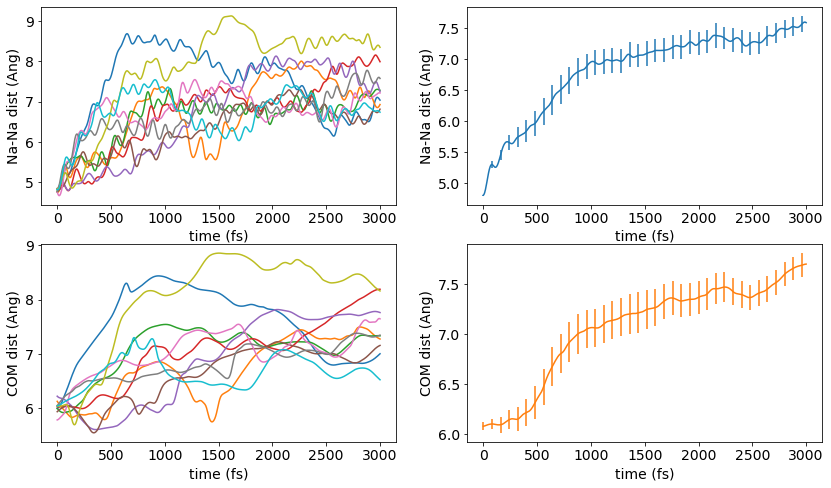

In [14]:
%matplotlib inline
plt.rcParams.update({'font.size': 14})
dirs = np.arange(1,11)

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
for i in range(len(dirs)):
    plt.plot(t_frames, bond_dist[i])
plt.xlabel('time (fs)')
plt.ylabel('Na-Na dist (Ang)')

plt.subplot(2,2,2)
plt.plot(t_frames, avg_bond_dist, 'C0')
plt.errorbar(t_frames[::20], avg_bond_dist[::20], yerr=sem_bond_dist[::20], color='C0', linestyle='none')
plt.xlabel('time (fs)')
plt.ylabel('Na-Na dist (Ang)')

plt.subplot(2,2,3)
for i in range(len(dirs)):
    plt.plot(t_frames, com_dist[i])
plt.xlabel('time (fs)')
plt.ylabel('COM dist (Ang)')

plt.subplot(2,2,4)
plt.plot(t_frames, avg_com_dist, 'C1')
plt.errorbar(t_frames[::20], avg_com_dist[::20], yerr=sem_com_dist[::20], color='C1', linestyle='none')
plt.xlabel('time (fs)')
plt.ylabel('COM dist (Ang)')

Text(0, 0.5, 'COM dist (Ang)')

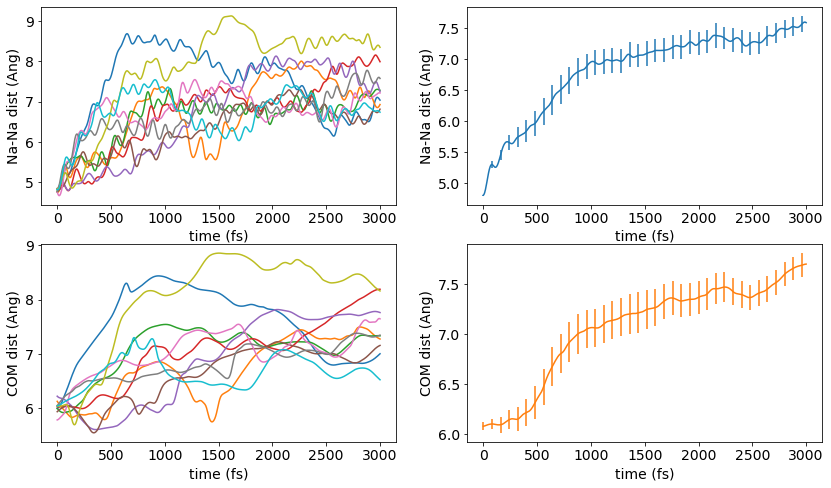

In [15]:
dirs = np.arange(11,21)

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
for i in range(len(dirs)):
    plt.plot(t_frames, bond_dist[i])
plt.xlabel('time (fs)')
plt.ylabel('Na-Na dist (Ang)')

plt.subplot(2,2,2)
plt.plot(t_frames, avg_bond_dist, 'C0')
plt.errorbar(t_frames[::20], avg_bond_dist[::20], yerr=sem_bond_dist[::20], color='C0', linestyle='none')
plt.xlabel('time (fs)')
plt.ylabel('Na-Na dist (Ang)')

plt.subplot(2,2,3)
for i in range(len(dirs)):
    plt.plot(t_frames, com_dist[i])
plt.xlabel('time (fs)')
plt.ylabel('COM dist (Ang)')

plt.subplot(2,2,4)
plt.plot(t_frames, avg_com_dist, 'C1')
plt.errorbar(t_frames[::20], avg_com_dist[::20], yerr=sem_com_dist[::20], color='C1', linestyle='none')
plt.xlabel('time (fs)')
plt.ylabel('COM dist (Ang)')

In [ ]:
root = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/45init/'
dirs = np.arange(1,21)

(t0, t, dt) = (0, 5000, 4)
t_frames = np.arange(t0, t+dt, dt)

coord_num = np.zeros([len(dirs), len(t_frames), 2])
node_angle = np.zeros([len(dirs), len(t_frames)])
mol_geo = np.zeros([len(dirs), len(t_frames), 2])
for i in range(len(dirs)):
    my_dir = root+str(dirs[i])
    dipole = np.loadtxt(my_dir+'/out.dip')[int(t0/4):int(t/4+1):int(dt/4),3:6]
    for j in range(len(t_frames)):
        r_Na, r_THF = thf_lib.readPos(my_dir+'/out.conf', t_frames[j])
        coord_num[i,j] = thf_lib.calcCoordNum(r_Na, r_THF)
        node_angle[i,j] = thf_lib.calcNodeAngle(r_Na, dipole[j])
        # calculating molecular geometry
        coord_indices = thf_lib.findCoordIndex(r_Na, r_THF)[0]
        na1_indices = 5*np.array([n for n in coord_indices[0] if n >= 0])
        na2_indices = 5*np.array([n for n in coord_indices[1] if n >= 0])
        mol_geo[i,j,0] = thf_lib.calcMolGeo(r_Na[0], r_THF[na1_indices])
        mol_geo[i,j,1] = thf_lib.calcMolGeo(r_Na[1], r_THF[na2_indices])
avg_coord_num = np.average(coord_num, axis=0) 
sem_coord_num = stats.sem(coord_num, axis=0)
std_coord_num = np.std(coord_num, axis=0)
avg_node_angle = np.average(node_angle, axis=0)
sem_node_angle = stats.sem(node_angle, axis=0)
std_node_angle = np.std(node_angle, axis=0)
avg_mol_geo = np.average(mol_geo, axis=0)
sem_mol_geo = stats.sem(mol_geo, axis=0)
std_mol_geo = np.std(mol_geo, axis=0)

In [ ]:
root = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/45init/'
dirs = np.arange(1,21)

(t0, t, dt) = (0,5000,4)
t_frames = np.arange(t0, t+dt, dt)
(r0, r, dr) = (5, 10, 0.1)
r_max = np.arange(r0, r+dr, dr)

bond_dist = np.array([np.loadtxt(root+str(i)+'/bondumb2.out')[int(t0/4):int(t/4+1):int(dt/4),1] for i in dirs])
avg_bond_dist = np.average(bond_dist, axis=0)
sem_bond_dist = stats.sem(bond_dist, axis=0)
std_bond_dist = np.std(bond_dist, axis=0)

prob_r_max = np.zeros([len(t_frames), len(r_max)])
for i in range(1,len(t_frames)):
    for j in range(len(dirs)):
        if np.max(bond_dist[j,:i]) < r and np.max(bond_dist[j,:i]) > r0:
            my_ind = int((np.max(bond_dist[j,:i])-r0)/dr)
            prob_r_max[i,:my_ind] += 1
        elif np.max(bond_dist[j,:i]) > r:
            prob_r_max[i] += 1
prob_r_max /= len(dirs)

In [ ]:
root = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/45init/'
dirs = np.arange(1,21)

(t0, t, dt) = (0, 5000, 4)
t_frames = np.arange(t0, t+dt, dt)

U_nana = np.zeros([len(dirs), len(t_frames)])
U_nathf = np.zeros([len(dirs), len(t_frames)])
U_thfthf = np.zeros([len(dirs), len(t_frames)])
U_quant = np.zeros([len(dirs), len(t_frames)])
for d in range(len(dirs)):
    my_dir = root+str(dirs[d])
    U_quant[d] = np.loadtxt(my_dir+'/out.quante2')[int(t0/4):int(t/4+1):int(dt/4),1]
    for i in range(len(t_frames)):
        r_Na, r_THF = thf_lib.readPos(my_dir+'/out.conf', t_frames[i])
        
        U_nana[d,i] = thf_lib.calcUNaNa(r_Na[0], r_Na[1])
        
        coord_indices = thf_lib.findCoordIndex(r_Na, r_THF)[0]
        coord_indices = 5*np.array([n for n in coord_indices.flatten() if n >= 0])
        coord_indices = np.array(list(set(coord_indices)))
        for j in range(len(coord_indices)):
            U_nathf[d,i] += thf_lib.calcUNaTHF(r_Na[0], r_THF[coord_indices[j]:coord_indices[j]+5])
            U_nathf[d,i] += thf_lib.calcUNaTHF(r_Na[1], r_THF[coord_indices[j]:coord_indices[j]+5])
        for j in range(len(coord_indices)-1):
            for k in range(j+1,len(coord_indices)):
                U_thfthf[d,i] += thf_lib.calcUTHFTHF(r_THF[coord_indices[j]:coord_indices[j]+5],
                                                    r_THF[coord_indices[k]:coord_indices[k]+5])
avg_U_nana = np.average(U_nana, axis=0)
sem_U_nana = stats.sem(U_nana, axis=0)
avg_U_nathf = np.average(U_nathf, axis=0)
sem_U_nathf = stats.sem(U_nathf, axis=0)
avg_U_thfthf = np.average(U_thfthf, axis=0)
sem_U_thfthf = stats.sem(U_thfthf, axis=0)
avg_U_quant = np.average(U_quant, axis=0)
sem_U_quant = stats.sem(U_quant, axis=0)
avg_bond_dist = np.average(bond_dist, axis=0)
sem_bond_dist = stats.sem(bond_dist, axis=0)

Text(0.5, 0, 'time (fs)')

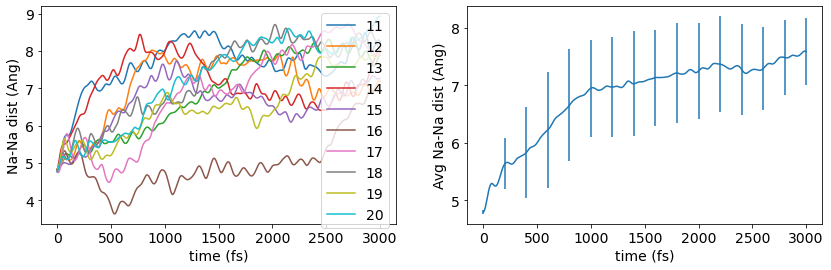

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
dirs = np.arange(11,21)
for i in range(len(dirs)):
    plt.plot(t_frames, bond_dist[dirs[i]-1], label=dirs[i])
plt.legend(loc=1)
plt.ylabel('Na-Na dist (Ang)')
plt.xlabel('time (fs)')

plt.subplot(1,2,2)
plt.plot(t_frames, avg_bond_dist)
plt.errorbar(t_frames[::50], avg_bond_dist[::50], yerr=std_bond_dist[::50], color='C0', linestyle='none')
plt.ylabel('Avg Na-Na dist (Ang)')
plt.xlabel('time (fs)')

Text(0.5, 0, 'time (fs)')

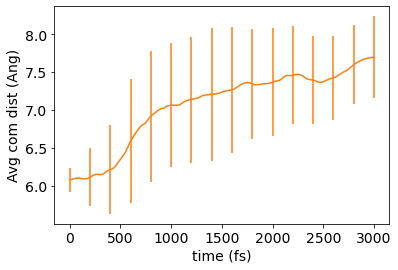

In [68]:
plt.rcParams.update({'font.size': 14})
plt.plot(t_frames, avg_com_dist, color='C1')
plt.errorbar(t_frames[::50], avg_com_dist[::50], yerr=std_com_dist[::50], color='C1', linestyle='none')
plt.ylabel('Avg com dist (Ang)')
plt.xlabel('time (fs)')

In [29]:
np.shape(coord_num)

(20, 1251, 2)

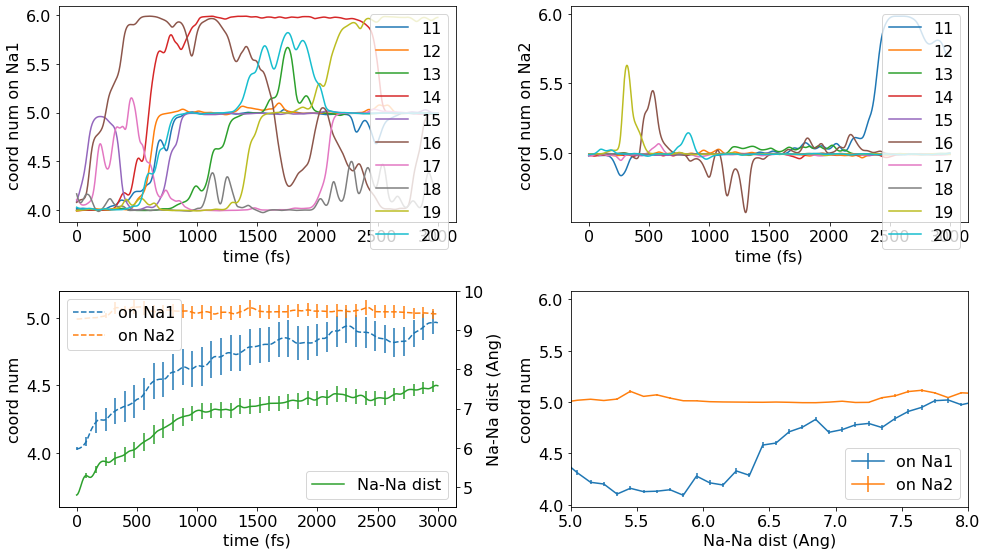

In [16]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
dirs = np.arange(11,21)
for i in range(len(dirs)):
    plt.plot(t_frames, coord_num[dirs[i]-1,:,0], label=str(dirs[i]))
plt.legend(loc=1)
plt.ylabel('coord num on Na1')
plt.xlabel('time (fs)')

plt.subplot(2,2,2)
for i in range(len(dirs)):
    plt.plot(t_frames, coord_num[dirs[i]-1,:,1], label=str(dirs[i]))
plt.legend(loc=1)
plt.ylabel('coord num on Na2')
plt.xlabel('time (fs)')

plt.subplot(2,2,3)
plt.plot(t_frames, avg_coord_num[:,0], 'C0--', label='on Na1')
plt.errorbar(t_frames[::20], avg_coord_num[::20,0], yerr=sem_coord_num[::20,0], color='C0', linestyle='none')
plt.plot(t_frames, avg_coord_num[:,1], 'C1--', label='on Na2')
plt.errorbar(t_frames[::20], avg_coord_num[::20,1], yerr=sem_coord_num[::20,1], color='C1', linestyle='none')
plt.ylim([3.6,5.2])
plt.legend(loc=2)
plt.ylabel('coord num')
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(t_frames, avg_bond_dist, color='C2', label='Na-Na dist')
plt.errorbar(t_frames[::20], avg_bond_dist[::20], yerr=sem_bond_dist[::20], color='C2', linestyle='none')
plt.ylim([4.5,10])
plt.legend(loc=4)
plt.ylabel('Na-Na dist (Ang)')

plt.subplot(2,2,4)
# plt.plot(avg_bond_dist, avg_coord_num[:,0], 'C0', label='on Na1')
# plt.errorbar(avg_bond_dist[::20], avg_coord_num[::20,0], yerr=sem_coord_num[::20,0], color='C0', linestyle='none')
# plt.plot(avg_bond_dist, avg_coord_num[:,1], 'C1', label='on Na2')
# plt.errorbar(avg_bond_dist[::20], avg_coord_num[::20,1], yerr=sem_coord_num[::20,1], color='C1', linestyle='none')
plt.errorbar(binned_coord_num1[:,0], binned_coord_num1[:,1], yerr=binned_coord_num1[:,2], color='C0', label='on Na1')
plt.errorbar(binned_coord_num2[:,0], binned_coord_num2[:,1], yerr=binned_coord_num2[:,2], color='C1', label='on Na2')
plt.xlim([5,8])
plt.legend(loc=4)
plt.ylabel('coord num')
plt.xlabel('Na-Na dist (Ang)')

plt.tight_layout()

In [6]:
plt.rcParams.update({'font.size': 16})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


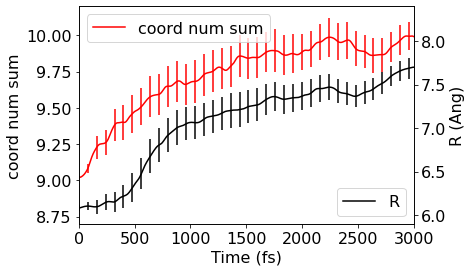

In [7]:
plt.plot(t_frames, avg_coord_num[:,0]+avg_coord_num[:,1], 'r', label='coord num sum')
plt.errorbar(t_frames[::20], avg_coord_num[::20,0]+avg_coord_num[::20,1], yerr=np.sqrt(sem_coord_num[::20,0]**2+sem_coord_num[::20,1]**2), color='r', linestyle='none')
#plt.ylim([8.8,10])
plt.ylim([8.7, 10.2])
plt.legend(loc=2)
#plt.xlim([0,1000])
plt.xlim([0,3000])
plt.ylabel('coord num sum')
plt.xlabel('Time (fs)')

plt.twinx()
plt.plot(t_frames, avg_com_dist, color='k', label='R')
plt.errorbar(t_frames[::20], avg_com_dist[::20], yerr=sem_com_dist[::20], color='k', linestyle='none')
#plt.ylim([6,8])
plt.ylim([5.9, 8.4])
plt.legend(loc=4)
plt.ylabel('R (Ang)')

plt.savefig('Na2+_THF_liq/45init/figs/avg_coord_num_and_com_dist_time.eps', format='eps')

In [9]:
np.save('45liq_sem_coord.npy', sem_coord_num)

In [8]:
np.save('45liq_avg_coord.npy', avg_coord_num)

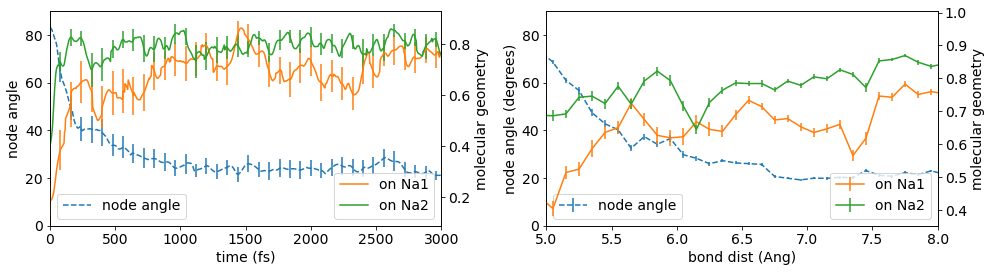

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(t_frames, avg_node_angle, 'C0--', label='node angle')
plt.errorbar(t_frames[::20], avg_node_angle[::20], yerr=sem_node_angle[::20], color='C0', linestyle='none')
plt.ylim([0,90])
plt.xlim([0,3000])
plt.legend(loc=3)
plt.ylabel('node angle')
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(t_frames, avg_mol_geo[:,0], color='C1', label='on Na1')
plt.errorbar(t_frames[::20], avg_mol_geo[::20,0], color='C1', yerr=sem_mol_geo[::20,0], linestyle='none')
plt.plot(t_frames, avg_mol_geo[:,1], color='C2', label='on Na2')
plt.errorbar(t_frames[::20], avg_mol_geo[::20,1], color='C2', yerr=sem_mol_geo[::20,1], linestyle='none')
#plt.ylim([0.5,1])
plt.ylabel('molecular geometry')
plt.legend(loc=4)

plt.subplot(1,2,2)
plt.errorbar(binned_angles[:,0], binned_angles[:,1], yerr=binned_angles[:,2], color='C0', linestyle='--', label='node angle')
plt.ylim([0,90])
plt.xlim([4.8, 10.2])
plt.ylabel('node angle (degrees)')
plt.xlabel('bond dist (Ang)')
plt.legend(loc=3)
plt.twinx()

plt.errorbar(binned_geo1[:,0], binned_geo1[:,1], yerr=binned_geo1[:,2], color='C1', label='on Na1')
plt.errorbar(binned_geo2[:,0], binned_geo2[:,1], yerr=binned_geo2[:,2], color='C2', label='on Na2')
#plt.ylim([0.5,1])
plt.xlim([5,8])
plt.ylabel('molecular geometry')
plt.legend(loc=4)

plt.tight_layout()

Text(0.5, 0, 'r (Ang)')

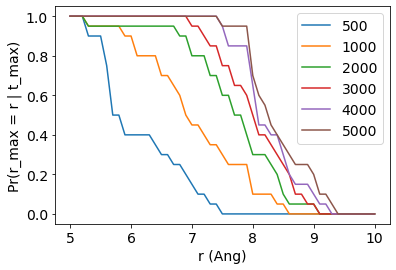

In [27]:
plt.plot(r_max, prob_r_max[int(500/dt)], label=str(t_frames[int(500/dt)]))
plt.plot(r_max, prob_r_max[int(1000/dt)], label=str(t_frames[int(1000/dt)]))
plt.plot(r_max, prob_r_max[int(2000/dt)], label=str(t_frames[int(2000/dt)]))
plt.plot(r_max, prob_r_max[int(3000/dt)], label=str(t_frames[int(3000/dt)]))
plt.plot(r_max, prob_r_max[int(4000/dt)], label=str(t_frames[int(4000/dt)]))
plt.plot(r_max, prob_r_max[-1], label=str(t_frames[-1]))
plt.legend(loc=1)
plt.ylabel('Pr(r_max = r | t_max)')
plt.xlabel('r (Ang)')

In [30]:
print(r_max[29], prob_r_max[-1,29])

7.89999999999999 0.95


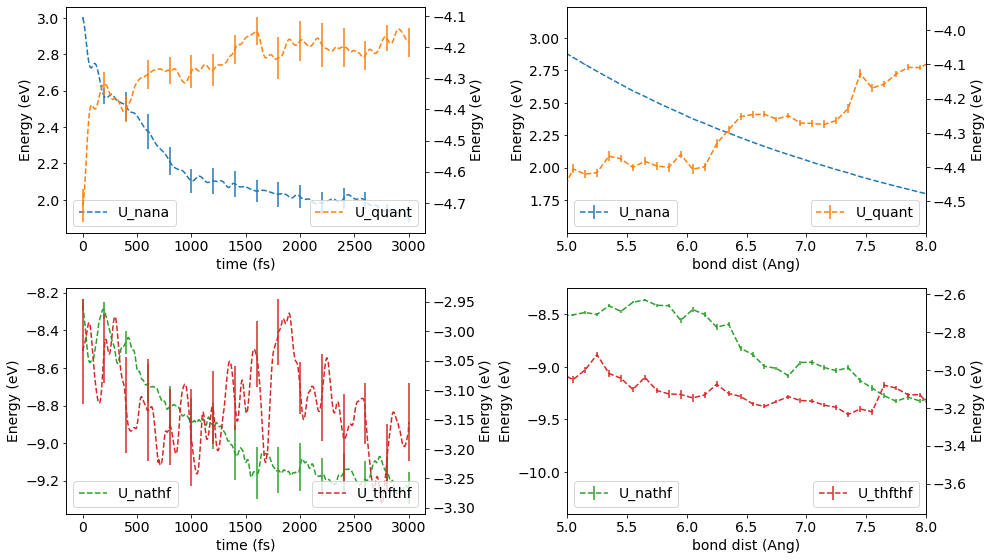

In [20]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(t_frames, avg_U_nana, 'C0--', label='U_nana')
plt.errorbar(t_frames[::50], avg_U_nana[::50], yerr=sem_U_nana[::50], color='C0', linestyle='none')
plt.legend(loc=3)
plt.ylabel('Energy (eV)')
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(t_frames, avg_U_quant, 'C1--', label='U_quant')
plt.errorbar(t_frames[::50], avg_U_quant[::50], yerr=sem_U_quant[::50], color='C1', linestyle='none')
plt.legend(loc=4)
plt.ylabel('Energy (eV)')

plt.subplot(2,2,2)
plt.errorbar(binned_U_nana[:,0], binned_U_nana[:,1], yerr=binned_U_nana[:,2], color='C0', linestyle='--', label='U_nana')
plt.xlim([5,8])
plt.ylabel('Energy (eV)')
plt.xlabel('bond dist (Ang)')
plt.legend(loc=3)

plt.twinx()
plt.errorbar(binned_U_quant[:,0], binned_U_quant[:,1], yerr=binned_U_quant[:,2], color='C1', linestyle='--', label='U_quant')
plt.ylabel('Energy (eV)')
plt.legend(loc=4)

plt.subplot(2,2,3)
plt.plot(t_frames, avg_U_nathf, 'C2--', label='U_nathf')
plt.errorbar(t_frames[::50], avg_U_nathf[::50], yerr=sem_U_nathf[::50], color='C2', linestyle='none')
plt.legend(loc=3)
plt.ylabel('Energy (eV)')
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(t_frames, avg_U_thfthf, 'C3--', label='U_thfthf')
plt.errorbar(t_frames[::50], avg_U_thfthf[::50], yerr=sem_U_thfthf[::50], color='C3', linestyle='none')
plt.legend(loc=4)
plt.ylabel('Energy (eV)')

plt.subplot(2,2,4)
plt.errorbar(binned_U_nathf[:,0], binned_U_nathf[:,1], yerr=binned_U_nathf[:,2], color='C2', linestyle='--', label='U_nathf')
plt.xlim([5,8])
plt.ylabel('Energy (eV)')
plt.xlabel('bond dist (Ang)')
plt.legend(loc=3)

plt.twinx()
plt.errorbar(binned_U_thfthf[:,0], binned_U_thfthf[:,1], yerr=binned_U_thfthf[:,2], color='C3', linestyle='--', label='U_thfthf')
plt.ylabel('Energy (eV)')
plt.legend(loc=4)

plt.tight_layout()

In [83]:
np.shape(avg_U_nana+avg_U_nathf+avg_U_thfthf+U_quant)

(20, 751)

Text(0.5, 0, 'time (fs)')

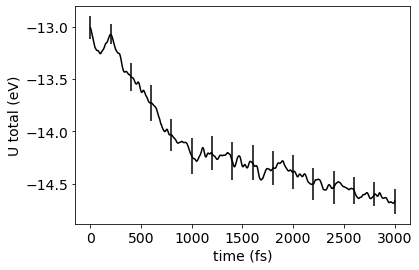

In [92]:
plt.plot(t_frames, avg_U_nana+avg_U_nathf+avg_U_thfthf+avg_U_quant, 'k')
plt.errorbar(t_frames[::50], (avg_U_nana+avg_U_nathf+avg_U_thfthf+avg_U_quant)[::50], yerr=np.sqrt(sem_U_nana**2+sem_U_nathf**2+sem_U_thfthf**2+sem_U_quant**2)[::50], color='k', linestyle='none')
plt.ylabel('U total (eV)')
plt.xlabel('time (fs)')

In [21]:
my_U_thfthf = lib.binScalarsBondDist(U_thfthf.flatten(), np.average(mol_geo, axis=2).flatten(), 0.4, 1, 0.05)
my_U_nathf = lib.binScalarsBondDist(U_nathf.flatten(), np.average(mol_geo, axis=2).flatten(), 0.4, 1, 0.05)

In [20]:
np.shape(np.average(mol_geo, axis=2))

(20, 1251)

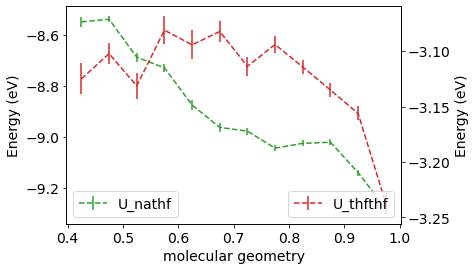

In [22]:
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(6,4))
plt.errorbar(my_U_nathf[:,0], my_U_nathf[:,1], yerr=my_U_nathf[:,2], color='C2', linestyle='--', label='U_nathf')
plt.ylabel('Energy (eV)')
plt.xlabel('molecular geometry')
plt.legend(loc=3)

plt.twinx()
plt.errorbar(my_U_thfthf[:,0], my_U_thfthf[:,1], yerr=my_U_thfthf[:,2], color='C3', linestyle='--', label='U_thfthf')
plt.ylabel('Energy (eV)')
plt.legend(loc=4)

In [23]:
binned2d_U_nana = thf_lib.binScalars2D(U_nana.flatten(), bond_dist.flatten(), mol_geo[:,:,1].flatten(), 4.75, 8, 0.25, 0.4, 1, 0.05)
binned2d_U_nathf = thf_lib.binScalars2D(U_nathf.flatten(), bond_dist.flatten(), mol_geo[:,:,1].flatten(), 4.75, 8, 0.25, 0.4, 1, 0.05)
binned2d_U_thfthf = thf_lib.binScalars2D(U_thfthf.flatten(), bond_dist.flatten(), mol_geo[:,:,1].flatten(), 4.75, 8, 0.25, 0.4, 1, 0.05)
binned2d_U_quant = thf_lib.binScalars2D(U_quant.flatten(), bond_dist.flatten(), mol_geo[:,:,1].flatten(), 4.75, 8, 0.25, 0.4, 1, 0.05)

In [11]:
plt.rcParams.update({'font.size': 16})

In [8]:
t_frames = np.arange(0,5004,4)

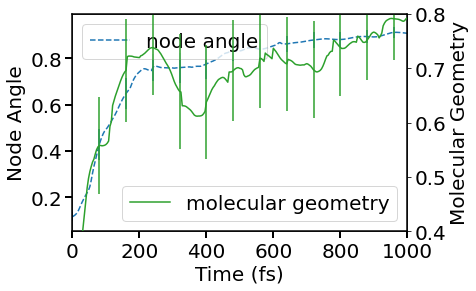

In [17]:
fig, axs = plt.subplots(figsize=(6,4))
axs.plot(t_frames, np.cos(avg_node_angle/180*np.pi), 'C0--', label='node angle')
axs.errorbar(t_frames[::20], np.cos(avg_node_angle[::20]/180*np.pi), yerr=np.sin(avg_node_angle[::20]/180*np.pi)*sem_node_angle[::20]/180*np.pi, color='C0', linestyle='none')
#axs.set_ylim([0,1])
axs.set_xlim([0,1000])
axs.legend(loc=2)
axs.set_ylabel('Node Angle')
axs.set_xlabel('Time (fs)')

ax2 = axs.twinx()
ax2.plot(t_frames, (avg_mol_geo[:,0]+avg_mol_geo[:,1])/2, color='C2', label='molecular geometry')
ax2.errorbar(t_frames[::20], (avg_mol_geo[::20,0]+avg_mol_geo[::20,1])/2, color='C2', yerr=np.sqrt(sem_mol_geo[::20,0]**2+sem_mol_geo[::20,1]**2), linestyle='none')
ax2.set_ylim([0.4,0.8])
ax2.set_ylabel('Molecular Geometry')
ax2.legend(loc=4)

axs.spines['top'].set_linewidth(1.5)
axs.spines['top'].set_color('k')
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_linewidth(1.5)
axs.spines['left'].set_color('k')
axs.spines['right'].set_linewidth(1.5)
axs.spines['right'].set_color('k')
axs.tick_params(which='major', length=7, width=2)

# plt.savefig('Na2+_THF_liq/45init/figs/node_angle_mol_geo.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


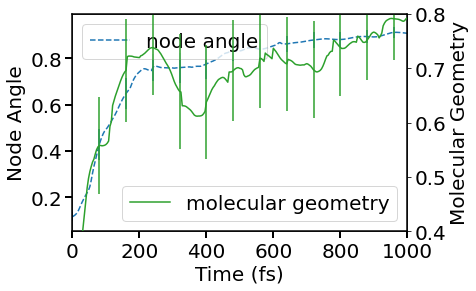

In [8]:
fig, axs = plt.subplots(figsize=(6,4))
axs.plot(t_frames, np.cos(avg_node_angle/180*np.pi), 'C0--', label='node angle')
axs.errorbar(t_frames[::20], np.cos(avg_node_angle[::20]/180*np.pi), yerr=np.sin(avg_node_angle[::20]/180*np.pi)*sem_node_angle[::20]/180*np.pi, color='C0', linestyle='none')
#axs.set_ylim([0,1])
axs.set_xlim([0,1000])
axs.legend(loc=2)
axs.set_ylabel('Node Angle')
axs.set_xlabel('Time (fs)')

ax2 = axs.twinx()
ax2.plot(t_frames, (avg_mol_geo[:,1]+avg_mol_geo[:,0])/2, color='C2', label='molecular geometry')
ax2.errorbar(t_frames[::20], (avg_mol_geo[::20,1]+avg_mol_geo[::20,0])/2, color='C2', yerr=np.sqrt(sem_mol_geo[::20,1]**2+sem_mol_geo[::20,0]**2), linestyle='none')
ax2.set_ylim([0.4,0.8])
ax2.set_ylabel('Molecular Geometry')
ax2.legend(loc=4)

axs.spines['top'].set_linewidth(1.5)
axs.spines['top'].set_color('k')
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_linewidth(1.5)
axs.spines['left'].set_color('k')
axs.spines['right'].set_linewidth(1.5)
axs.spines['right'].set_color('k')
axs.tick_params(which='major', length=7, width=2)

# plt.savefig('Na2+_THF_liq/45init/figs/node_angle_mol_geo.eps', format='eps')

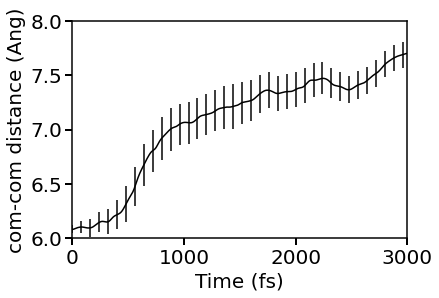

In [71]:
fig, axs = plt.subplots(figsize=(6,4))
axs.plot(t_frames, avg_com_dist, 'k')
axs.errorbar(t_frames[::20], avg_com_dist[::20], yerr=sem_com_dist[::20], color='k', linestyle='none')
axs.set_ylim([6,8])
axs.set_yticks(np.arange(6.0,8.5,0.5))
axs.set_xlim([0,3000])
axs.set_ylabel('com-com distance (Ang)')
axs.set_xlabel('Time (fs)')

axs.spines['top'].set_linewidth(1.5)
axs.spines['top'].set_color('k')
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_linewidth(1.5)
axs.spines['left'].set_color('k')
axs.spines['right'].set_linewidth(1.5)
axs.spines['right'].set_color('k')
axs.tick_params(which='major', length=7, width=2)
# axs.tick_params(axis='x', labelsize=14)
# axs.tick_params(axis='y', labelsize=14)

plt.savefig('Na2+_THF_liq/45init/figs/com_dist_time.eps', format='eps')

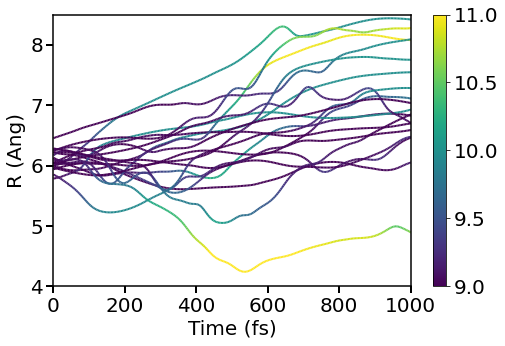

In [9]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

# fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig, axs = plt.subplots(figsize=(8,5))

dirs = np.arange(2,21)

x = t_frames
for i in range(len(dirs)):
    y = com_dist[i]
    dydx = coord_num[i,:,0] + coord_num[i,:,1]
    
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    norm = plt.Normalize(9, 11)
    lc = LineCollection(segments, cmap='viridis', norm=norm)
    # Set the values used for colormapping
    lc.set_array(dydx)
    lc.set_linewidth(2)
    line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min(), x.max())
axs.set_ylim(4, 8.5)
axs.set_xlim([0,1000])
axs.set_xlabel('Time (fs)')
axs.set_ylabel('R (Ang)')

axs.spines['top'].set_linewidth(1.5)
axs.spines['top'].set_color('k')
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_linewidth(1.5)
axs.spines['left'].set_color('k')
axs.spines['right'].set_linewidth(1.5)
axs.spines['right'].set_color('k')
axs.tick_params(which='major', length=7, width=2)
# axs.tick_params(axis='x', labelsize=14)
# axs.tick_params(axis='y', labelsize=14)
plt.savefig('Na2+_THF_liq/45init/figs/com_dist_time_swarm.eps', format='eps')
plt.show()

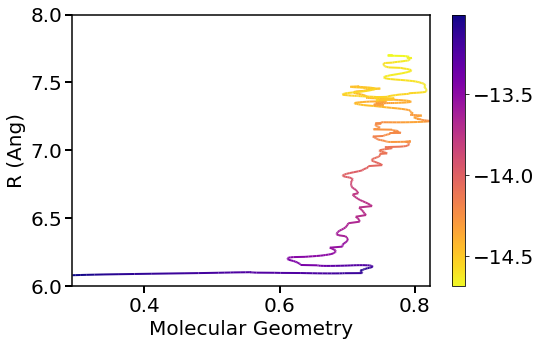

In [8]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

# fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig, axs = plt.subplots(figsize=(8,5))

x = (avg_mol_geo[:,1]+avg_mol_geo[:,0])/2
y = avg_com_dist
dydx = avg_U_nathf+avg_U_thfthf+avg_U_quant+avg_U_nana

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='plasma_r', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min(), x.max())
axs.set_ylim(6, 8)
axs.set_yticks(np.arange(6.0, 8.5, 0.5))
axs.set_xlabel('Molecular Geometry')
axs.set_ylabel('R (Ang)')

axs.spines['top'].set_linewidth(1.5)
axs.spines['top'].set_color('k')
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_linewidth(1.5)
axs.spines['left'].set_color('k')
axs.spines['right'].set_linewidth(1.5)
axs.spines['right'].set_color('k')
axs.tick_params(which='major', length=7, width=2)
# axs.tick_params(axis='x', labelsize=14)
# axs.tick_params(axis='y', labelsize=14)
plt.savefig('Na2+_THF_liq/45init/figs/energy_2D.eps', format='eps')
plt.show()

Text(0, 0.5, 'com-com distance (Ang)')

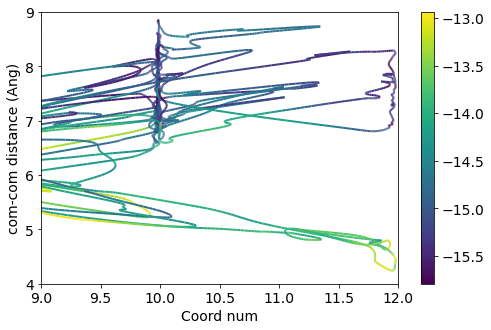

In [28]:
fig, axs = plt.subplots(figsize=(8,5))

dirs = np.arange(2,21)

#x = t_frames
for i in range(len(dirs)):
    x = coord_num[i,:,0] + coord_num[i,:,0]
    y = com_dist[i]
    dydx = U_nana[i] + U_nathf[i] + U_thfthf[i] + U_quant[i]
#   dydx = coord_num[i,:,0] + coord_num[i,:,1]
    
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    norm = plt.Normalize(dydx.min(), dydx.max())
    lc = LineCollection(segments, cmap='viridis', norm=norm)
    # Set the values used for colormapping
    lc.set_array(dydx)
    lc.set_linewidth(2)
    line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min(), x.max())
axs.set_ylim(4, 9)
axs.set_xlim([9,12])
axs.set_xlabel('Coord num')
axs.set_ylabel('com-com distance (Ang)')

Text(0, 0.5, 'total U')

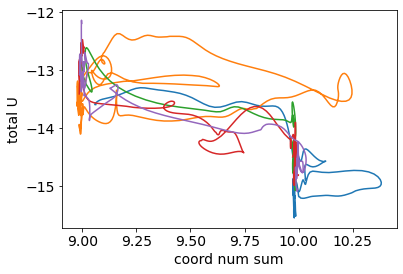

In [29]:
for i in range(5):
    plt.plot(coord_num[i,:500,0]+coord_num[i,:500,1], U_nana[i,:500] + U_nathf[i,:500] + U_thfthf[i,:500] + U_quant[i,:500])
plt.xlabel('coord num sum')
plt.ylabel('total U')

Text(0, 0.5, 'U nana')

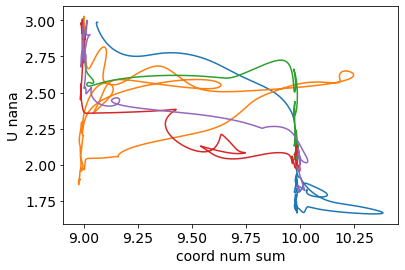

In [30]:
for i in range(5):
    plt.plot(coord_num[i,:500,0]+coord_num[i,:500,1], U_nana[i,:500])
plt.xlabel('coord num sum')
plt.ylabel('U nana')

Text(0, 0.5, 'U nathf')

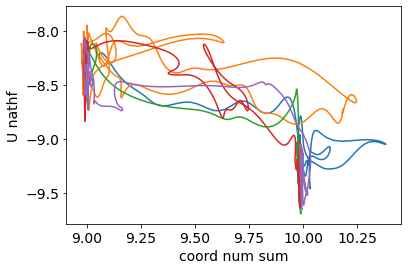

In [31]:
for i in range(5):
    plt.plot(coord_num[i,:500,0]+coord_num[i,:500,1], U_nathf[i,:500])
plt.xlabel('coord num sum')
plt.ylabel('U nathf')

Text(0, 0.5, 'U thfthf')

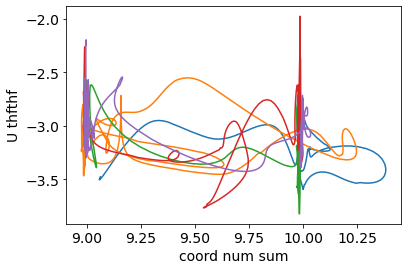

In [32]:
for i in range(5):
    plt.plot(coord_num[i,:500,0]+coord_num[i,:500,1], U_thfthf[i,:500])
plt.xlabel('coord num sum')
plt.ylabel('U thfthf')

Text(0, 0.5, 'U quant')

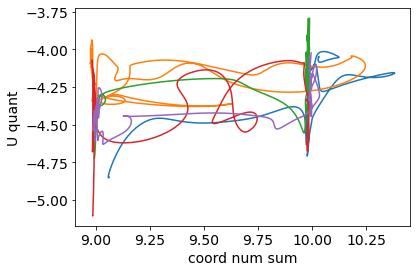

In [33]:
for i in range(5):
    plt.plot(coord_num[i,:500,0]+coord_num[i,:500,1], U_quant[i,:500])
plt.xlabel('coord num sum')
plt.ylabel('U quant')

In [34]:
coord_num_sum = coord_num[:,:,0]+coord_num[:,:,1]
my_coord_sum = coord_num_sum.flatten()
my_U_total = (U_nana+U_nathf+U_thfthf+U_quant).flatten()

In [59]:
my_hist_total = thf_lib.binScalarsBondDist(my_U_total, my_coord_sum, 9.0, 11.2, 0.05)
my_hist_nathf = thf_lib.binScalarsBondDist(U_nathf.flatten(), my_coord_sum, 9.0, 11.2, 0.05)
my_hist_thfthf = thf_lib.binScalarsBondDist(U_thfthf.flatten(), my_coord_sum, 9.0, 11.2, 0.05)
my_hist_nana = thf_lib.binScalarsBondDist(U_nana.flatten(), my_coord_sum, 9.0, 11.2, 0.05)
my_hist_quant = thf_lib.binScalarsBondDist(U_quant.flatten(), my_coord_sum, 9.0, 11.2, 0.05)

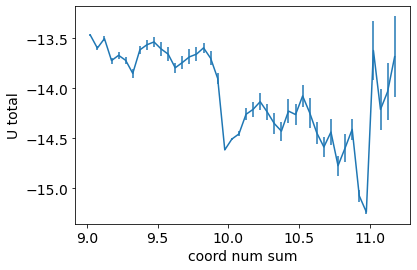

In [63]:
plt.errorbar(my_hist_total[:,0], my_hist_total[:,1], yerr=my_hist_total[:,2])
plt.ylabel('U total')
plt.xlabel('coord num sum')
plt.savefig('/u/home/k/kimvonga/analysis/Na2+_THF_liq/45init/figs/Utotal_coord.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


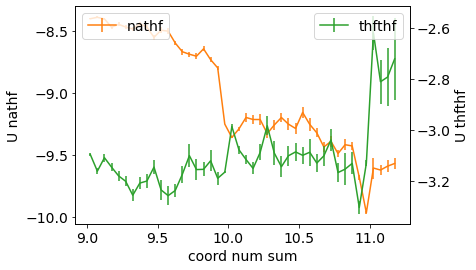

In [64]:
plt.errorbar(my_hist_nathf[:,0], my_hist_nathf[:,1], color='C1', yerr=my_hist_nathf[:,2], label='nathf')
plt.ylabel('U nathf')
plt.xlabel('coord num sum')
plt.legend(loc=2)
plt.twinx()
plt.errorbar(my_hist_thfthf[:,0], my_hist_thfthf[:,1], yerr=my_hist_thfthf[:,2], color='C2', label='thfthf')
plt.ylabel('U thfthf')
plt.legend(loc=1)
plt.savefig('/u/home/k/kimvonga/analysis/Na2+_THF_liq/45init/figs/Unathf_Uthfthf_coord.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


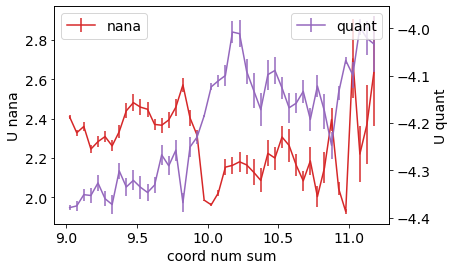

In [65]:
plt.errorbar(my_hist_nana[:,0], my_hist_nana[:,1], yerr=my_hist_nana[:,2], color='C3', label='nana')
plt.ylabel('U nana')
plt.xlabel('coord num sum')
plt.legend(loc=2)
plt.twinx()
plt.errorbar(my_hist_quant[:,0], my_hist_quant[:,1], yerr=my_hist_quant[:,2], color='C4', label='quant')
plt.ylabel('U quant')
plt.legend(loc=1)
plt.savefig('/u/home/k/kimvonga/analysis/Na2+_THF_liq/45init/figs/Unana_Uquant_coord.eps', format='eps')

(0.0, 500.0)

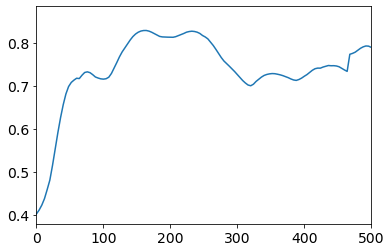

In [39]:
plt.plot(t_frames, avg_mol_geo[:,1])
plt.xlim([0,500])

In [40]:
np.max(avg_mol_geo[:50,1])

0.8279624960427538

In [41]:
np.argwhere(avg_mol_geo[:,1] == np.max(avg_mol_geo[:50,1]))*4

array([[164]])

In [43]:
avg_U_total = avg_U_nana+avg_U_nathf+avg_U_thfthf+avg_U_quant

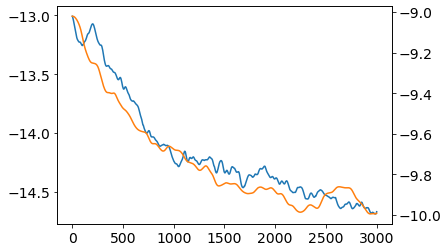

In [44]:
plt.plot(t_frames,avg_U_total)
plt.twinx()
plt.plot(t_frames,-avg_coord_num[:,1]-avg_coord_num[:,0],'C1')

In [45]:
np.average(avg_U_total[500:751]) - avg_U_total[41]

-1.395926487440784

In [46]:
avg_U_total[41]

-13.149477625529059

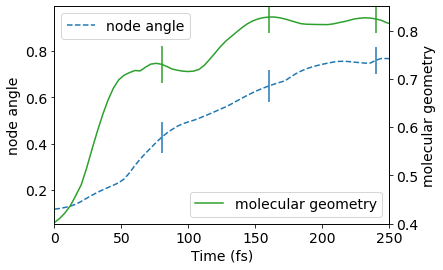

In [32]:
fig, axs = plt.subplots(figsize=(6,4))
axs.plot(t_frames, np.cos(avg_node_angle/180*np.pi), 'C0--', label='node angle')
axs.errorbar(t_frames[::20], np.cos(avg_node_angle[::20]/180*np.pi), yerr=np.sin(avg_node_angle[::20]/180*np.pi)*sem_node_angle[::20]/180*np.pi, color='C0', linestyle='none')
#axs.set_ylim([0,1])
axs.set_xlim([0,250])
axs.legend(loc=2)
axs.set_ylabel('node angle')
axs.set_xlabel('Time (fs)')

ax2 = axs.twinx()
ax2.plot(t_frames, avg_mol_geo[:,1], color='C2', label='molecular geometry')
ax2.errorbar(t_frames[::20], avg_mol_geo[::20,1], color='C2', yerr=sem_mol_geo[::20,1], linestyle='none')
ax2.set_ylim([0.4,0.85])
ax2.set_ylabel('molecular geometry')
ax2.legend(loc=4)

In [ ]:
plt.plot(t_frames, avg_U_nana-avg_U_nana[0], label='nana', color='C0')
plt.errorbar(t_frames[::20], avg_U_nana[::20]-avg_U_nana[0], yerr=np.sqrt(sem_U_nana[::20]**2-sem_U_nana[0]**2), color='C0', linestyle='none')
plt.plot(t_frames, avg_U_nathf-avg_U_nathf[0], label='nathf', color='C1')
plt.errorbar(t_frames[::20], avg_U_nathf[::20]-avg_U_nathf[0], yerr=np.sqrt(sem_U_nathf[::20]**2-sem_U_nathf[0]**2), color='C1', linestyle='none')
plt.plot(t_frames, avg_U_thfthf-avg_U_thfthf[0], label='thfthf', color='C2')
#plt.errorbar(t_frames[::20], avg_U_thfthf[::20]-avg_U_thfthf[0], yerr=np.sqrt(sem_U_thfthf[::20]**2-sem_U_thfthf[0]**2), color='C2', linestyle='none')
plt.plot(t_frames, avg_U_quant-avg_U_quant[0], label='quant', color='C3')
#plt.errorbar(t_frames[::20], avg_U_quant[::20]-avg_U_quant[0], yerr=np.sqrt(sem_U_quant[::20]**2-sem_U_quant[0]**2), color='C3', linestyle='none')
plt.xlim([0,2000])
plt.legend(loc=3)

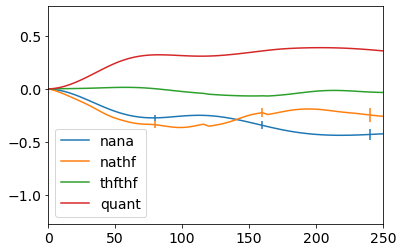

In [41]:
plt.plot(t_frames, avg_U_nana-avg_U_nana[0], label='nana', color='C0')
plt.errorbar(t_frames[::20], avg_U_nana[::20]-avg_U_nana[0], yerr=np.sqrt(sem_U_nana[::20]**2-sem_U_nana[0]**2), color='C0', linestyle='none')
plt.plot(t_frames, avg_U_nathf-avg_U_nathf[0], label='nathf', color='C1')
plt.errorbar(t_frames[::20], avg_U_nathf[::20]-avg_U_nathf[0], yerr=np.sqrt(sem_U_nathf[::20]**2-sem_U_nathf[0]**2), color='C1', linestyle='none')
plt.plot(t_frames, avg_U_thfthf-avg_U_thfthf[0], label='thfthf', color='C2')
#plt.errorbar(t_frames[::20], avg_U_thfthf[::20]-avg_U_thfthf[0], yerr=np.sqrt(sem_U_thfthf[::20]**2-sem_U_thfthf[0]**2), color='C2', linestyle='none')
plt.plot(t_frames, avg_U_quant-avg_U_quant[0], label='quant', color='C3')
#plt.errorbar(t_frames[::20], avg_U_quant[::20]-avg_U_quant[0], yerr=np.sqrt(sem_U_quant[::20]**2-sem_U_quant[0]**2), color='C3', linestyle='none')
plt.xlim([0,250])
plt.legend(loc=3)

<ipython-input-43-ba562cb27a88>:2: RuntimeWarning: invalid value encountered in sqrt
  plt.errorbar(t_frames[::20], avg_U_nana[::20]-avg_U_nana[60], yerr=np.sqrt(sem_U_nana[::20]**2-sem_U_nana[60]**2), color='C0', linestyle='none')
<ipython-input-43-ba562cb27a88>:4: RuntimeWarning: invalid value encountered in sqrt
  plt.errorbar(t_frames[::20], avg_U_nathf[::20]-avg_U_nathf[60], yerr=np.sqrt(sem_U_nathf[::20]**2-sem_U_nathf[60]**2), color='C1', linestyle='none')


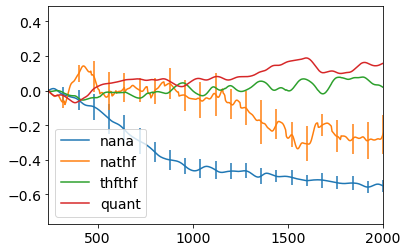

In [43]:
plt.plot(t_frames, avg_U_nana-avg_U_nana[60], label='nana', color='C0')
plt.errorbar(t_frames[::20], avg_U_nana[::20]-avg_U_nana[60], yerr=np.sqrt(sem_U_nana[::20]**2-sem_U_nana[60]**2), color='C0', linestyle='none')
plt.plot(t_frames, avg_U_nathf-avg_U_nathf[60], label='nathf', color='C1')
plt.errorbar(t_frames[::20], avg_U_nathf[::20]-avg_U_nathf[60], yerr=np.sqrt(sem_U_nathf[::20]**2-sem_U_nathf[60]**2), color='C1', linestyle='none')
plt.plot(t_frames, avg_U_thfthf-avg_U_thfthf[60], label='thfthf', color='C2')
#plt.errorbar(t_frames[::20], avg_U_thfthf[::20]-avg_U_thfthf[0], yerr=np.sqrt(sem_U_thfthf[::20]**2-sem_U_thfthf[0]**2), color='C2', linestyle='none')
plt.plot(t_frames, avg_U_quant-avg_U_quant[60], label='quant', color='C3')
#plt.errorbar(t_frames[::20], avg_U_quant[::20]-avg_U_quant[0], yerr=np.sqrt(sem_U_quant[::20]**2-sem_U_quant[0]**2), color='C3', linestyle='none')
plt.xlim([240,2000])
plt.legend(loc=3)

In [18]:
print(t_frames[0])
print(avg_U_nana[0], avg_U_nathf[0])
print(avg_U_thfthf[0], avg_U_quant[0])

0
2.9983086963189067 -8.85981719232218
0.14012971902228039 -4.70848915


In [22]:
print(t_frames[60], avg_com_dist[60]-avg_com_dist[0])
print(avg_U_nana[60]-avg_U_nana[0], avg_U_nathf[60]-avg_U_nathf[0])
print(avg_U_thfthf[60]-avg_U_thfthf[0], avg_U_quant[60]-avg_U_quant[0])

240 0.06478447941561782
-0.42986960733469015 -0.245557034178276
-0.02905512685744306 0.3705929999999995


In [21]:
print(avg_U_nana[60]+avg_U_nathf[60]+avg_U_thfthf[60]+avg_U_quant[60]-avg_U_nana[0]-avg_U_nathf[0]-avg_U_thfthf[0]-avg_U_quant[0])

-0.33388876837040815


In [14]:
binned2d_U_nana = thf_lib.binScalars2D(U_nana.flatten(), com_dist.flatten(), mol_geo[:,:,1].flatten(), 6, 8, 0.25, 0.2, 0.9, 0.05)
binned2d_U_nathf = thf_lib.binScalars2D(U_nathf.flatten(), com_dist.flatten(), mol_geo[:,:,1].flatten(), 6, 8, 0.25, 0.2, 0.9, 0.05)
binned2d_U_thfthf = thf_lib.binScalars2D(U_thfthf.flatten(), com_dist.flatten(), mol_geo[:,:,1].flatten(), 6, 8, 0.25, 0.2, 0.9, 0.05)
binned2d_U_quant = thf_lib.binScalars2D(U_quant.flatten(), com_dist.flatten(), mol_geo[:,:,1].flatten(), 6, 8, 0.25, 0.2, 0.9, 0.05)

/u/local/apps/anaconda3/2020.11/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/u/local/apps/anaconda3/2020.11/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


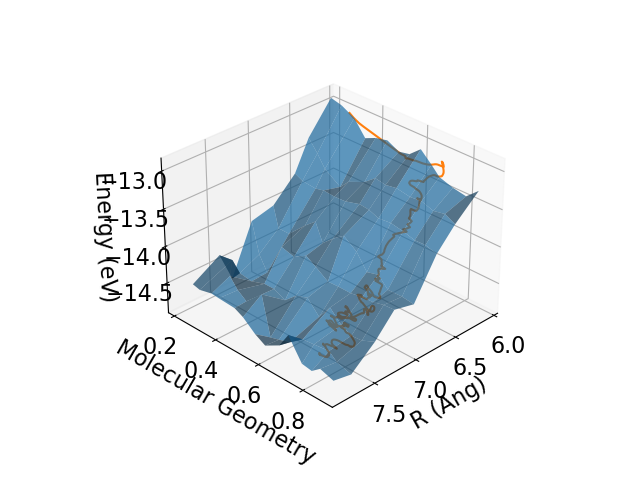

Text(0.5, 0, 'Energy (eV)')

In [15]:
%matplotlib notebook
plt.rcParams.update({'font.size': 16})
ax = plt.axes(projection='3d')
# ax.plot3D(bond_dist[15,:500], (mol_geo[15,:500,1]+mol_geo[15,:500,0])/2, U_nathf[15,:500]+U_thfthf[15,:500]+
#           U_nana[15,:500]+U_quant[15,:500], 'C0')
# for i in np.arange(0,3):
#     ax.plot3D(com_dist[i,:], mol_geo[i,:,1], U_nathf[i,:]+U_thfthf[i,:]+U_nana[i,:], 'C'+str(i))
# ax.plot3D(avg_com_dist, avg_mol_geo[:,1], avg_U_nathf+avg_U_thfthf+avg_U_nana, 'gray')
#ax.plot3D(avg_bond_dist, avg_mol_geo[:,0], avg_U_nathf+avg_U_thfthf+avg_U_nana, 'C0')
# ax.plot3D(avg_com_dist, avg_mol_geo[:,1], avg_U_nathf+avg_U_thfthf+avg_U_quant+avg_U_nana, 'C1')
ax.plot_surface(binned2d_U_nathf[:,:,0], binned2d_U_nathf[:,:,1], binned2d_U_nathf[:,:,2]+
                  binned2d_U_thfthf[:,:,2]+binned2d_U_nana[:,:,2]+binned2d_U_quant[:,:,2], rstride=1, cstride=1, alpha=0.7)
#ax.plot_wireframe(binned2d_U_nana[:,:,0], binned2d_U_nana[:,:,1], binned2d_U_nana[:,:,2], color='gray')
ax.plot3D(avg_com_dist, (avg_mol_geo[:,1]+avg_mol_geo[:,0])/2, avg_U_nana+avg_U_nathf+avg_U_thfthf+avg_U_quant, 'C1')
ax.set_xlabel('R (Ang)')
ax.set_ylabel('Molecular Geometry')
ax.set_zlabel('Energy (eV)')

In [ ]:
plt.savefig('Na2+_THF_liq/45init/figs/energy_surf.eps', format='eps')

In [7]:
def derivU2D(U):
    (a,b) = np.shape(U)[:2]
    dU = np.zeros([a,b,6])
    (dx, dy) = (np.round(U[1,0,0] - U[0,0,0],2), np.round(U[0,1,1] - U[0,0,1],2))

    for i in range(a-1):
        for j in range(b-1):
            dU[i,j,2] = (U[i+1,j,2] - U[i,j,2])/dx
            dU[i,j,3] = (U[i,j+1,2] - U[i,j,2])/dy

            dU[i,j,4] = np.sqrt((U[i+1,j,3]**2 + U[i,j,3]**2))/dx
            dU[i,j,5] = np.sqrt((U[i,j+1,3]**2 + U[i,j,3]**2))/dy

    dU[:,:,0] = U[:,:,0]
    dU[:,:,1] = U[:,:,1]
    return dU

In [12]:
binned2d_U_nana = thf_lib.binScalars2D(U_nana.flatten(), bond_dist.flatten(), mol_geo[:,:,1].flatten(), 4.75, 8, 0.25, 0.4, 1, 0.05)
dU_nana_2D = derivU2D(binned2d_U_nana)

<IPython.core.display.Javascript object>


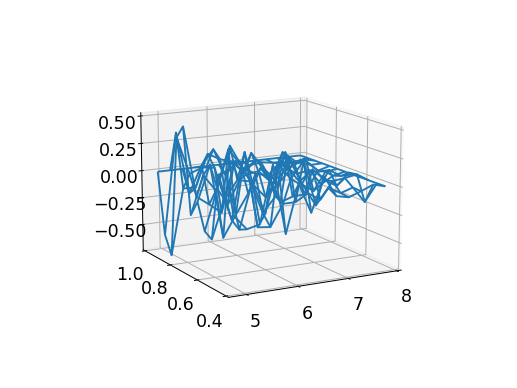

In [19]:
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.plot_wireframe(dU_nana_2D[:,:,0], dU_nana_2D[:,:,1],dU_nana_2D[:,:,3])
#ax.plot_wireframe(binned2d_U_nana[:,:,0], binned2d_U_nana[:,:,1], binned2d_U_nana[:,:,2])

For (5,5)

In [18]:
# to load data for each directory and each time point. use to save time
(t0, t, dt) = (0,3000,4)
t_frames = np.arange(t0, t+dt, dt)
bond_dist = np.load('Na2+_THF_liq/55init/bond_dist.npy')[:,:751]
com_dist = np.load('Na2+_THF_liq/55init/com_dist.npy')[:,:751]
coord_num = np.load('Na2+_THF_liq/55init/coord_num.npy')[:,:751]
node_angle = np.load('Na2+_THF_liq/55init/node_angle.npy')[:,:751]
mol_geo = np.load('Na2+_THF_liq/55init/mol_geo.npy')[:,:751]
U_nana = np.load('Na2+_THF_liq/55init/S_r/U_nana.npy')
U_nathf = np.load('Na2+_THF_liq/55init/S_r/U_nathf.npy')
U_thfthf = np.load('Na2+_THF_liq/55init/S_r/U_thfthf.npy')
U_quant = np.load('Na2+_THF_liq/55init/S_r/U_quant.npy')

In [19]:
avg_bond_dist = np.average(bond_dist, axis=0)
sem_bond_dist = stats.sem(bond_dist, axis=0)
std_bond_dist = np.std(bond_dist, axis=0)
avg_com_dist = np.average(com_dist, axis=0)
sem_com_dist = stats.sem(com_dist, axis=0)
std_com_dist = np.std(com_dist, axis=0)
avg_coord_num = np.average(coord_num, axis=0) 
sem_coord_num = stats.sem(coord_num, axis=0)
std_coord_num = np.std(coord_num, axis=0)
avg_node_angle = np.average(node_angle, axis=0)
sem_node_angle = stats.sem(node_angle, axis=0)
std_node_angle = np.std(node_angle, axis=0)
avg_mol_geo = np.average(mol_geo, axis=0)
sem_mol_geo = stats.sem(mol_geo, axis=0)
std_mol_geo = np.std(mol_geo, axis=0)
avg_U_nana = np.average(U_nana, axis=0)
sem_U_nana = stats.sem(U_nana, axis=0)
avg_U_nathf = np.average(U_nathf, axis=0)
sem_U_nathf = stats.sem(U_nathf, axis=0)
avg_U_thfthf = np.average(U_thfthf, axis=0)
sem_U_thfthf = stats.sem(U_thfthf, axis=0)
avg_U_quant = np.average(U_quant, axis=0)
sem_U_quant = stats.sem(U_quant, axis=0)
avg_bond_dist = np.average(bond_dist, axis=0)
sem_bond_dist = stats.sem(bond_dist, axis=0)

In [20]:
binned_angles = lib.binScalarsBondDist(node_angle.flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_geo1 = lib.binScalarsBondDist(mol_geo[:,:,0].flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_geo2 = lib.binScalarsBondDist(mol_geo[:,:,1].flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_coord_num1 = lib.binScalarsBondDist(coord_num[:,:,0].flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_coord_num2 = lib.binScalarsBondDist(coord_num[:,:,1].flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_U_nana = lib.binScalarsBondDist(U_nana.flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_U_nathf = lib.binScalarsBondDist(U_nathf.flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_U_thfthf = lib.binScalarsBondDist(U_thfthf.flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)
binned_U_quant = lib.binScalarsBondDist(U_quant.flatten(), bond_dist.flatten(), 4.5, 10.5, 0.1)

/u/local/apps/anaconda3/2020.11/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/u/local/apps/anaconda3/2020.11/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/u/local/apps/anaconda3/2020.11/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/u/local/apps/anaconda3/2020.11/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/u/local/apps/anaconda3/2020.11/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
root = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/55init/'
dirs = np.arange(2,11)

(t0, t, dt) = (0,3000,4)
t_frames = np.arange(t0, t+dt, dt)

bond_dist = np.array([np.loadtxt(root+str(i)+'/bondumb2.out')[int(t0/4):int(t/4+1):int(dt/4),1] for i in dirs])
com_dist = np.zeros([len(dirs), len(t_frames)])
for i in range(len(dirs)):
    my_dir = root+str(dirs[i])

    r_com = thf_lib.calcCOMPosConf(my_dir, t0, t, dt)
    com_dist[i] = np.array([lib.dist(r_com[t,0], r_com[t,1]) for t in range(len(t_frames))])
avg_bond_dist = np.average(bond_dist, axis=0)
sem_bond_dist = stats.sem(bond_dist, axis=0)
std_bond_dist = np.std(bond_dist, axis=0)
avg_com_dist = np.average(com_dist, axis=0)
sem_com_dist = stats.sem(com_dist, axis=0)
std_com_dist = np.std(com_dist, axis=0)

Text(0, 0.5, 'COM dist (Ang)')

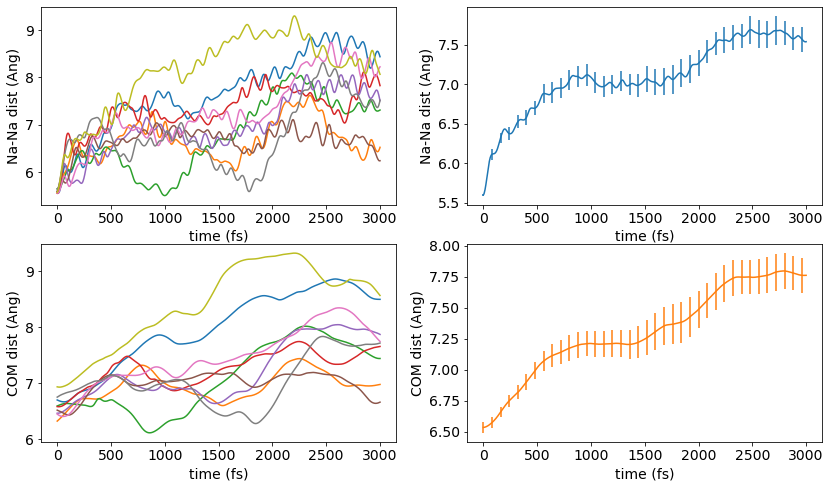

In [17]:
%matplotlib inline
plt.rcParams.update({'font.size': 14})
dirs = np.arange(2,11)

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
for i in range(len(dirs)):
    plt.plot(t_frames, bond_dist[i])
plt.xlabel('time (fs)')
plt.ylabel('Na-Na dist (Ang)')

plt.subplot(2,2,2)
plt.plot(t_frames, avg_bond_dist, 'C0')
plt.errorbar(t_frames[::20], avg_bond_dist[::20], yerr=sem_bond_dist[::20], color='C0', linestyle='none')
plt.xlabel('time (fs)')
plt.ylabel('Na-Na dist (Ang)')

plt.subplot(2,2,3)
for i in range(len(dirs)):
    plt.plot(t_frames, com_dist[i])
plt.xlabel('time (fs)')
plt.ylabel('COM dist (Ang)')

plt.subplot(2,2,4)
plt.plot(t_frames, avg_com_dist, 'C1')
plt.errorbar(t_frames[::20], avg_com_dist[::20], yerr=sem_com_dist[::20], color='C1', linestyle='none')
plt.xlabel('time (fs)')
plt.ylabel('COM dist (Ang)')

In [16]:
root = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/55init/'
dirs = np.arange(11,21)

(t0, t, dt) = (0,3000,4)
t_frames = np.arange(t0, t+dt, dt)

bond_dist = np.array([np.loadtxt(root+str(i)+'/bondumb2.out')[int(t0/4):int(t/4+1):int(dt/4),1] for i in dirs])
com_dist = np.zeros([len(dirs), len(t_frames)])
for i in range(len(dirs)):
    my_dir = root+str(dirs[i])

    r_com = thf_lib.calcCOMPosConf(my_dir, t0, t, dt)
    com_dist[i] = np.array([lib.dist(r_com[t,0], r_com[t,1]) for t in range(len(t_frames))])
avg_bond_dist = np.average(bond_dist, axis=0)
sem_bond_dist = stats.sem(bond_dist, axis=0)
std_bond_dist = np.std(bond_dist, axis=0)
avg_com_dist = np.average(com_dist, axis=0)
sem_com_dist = stats.sem(com_dist, axis=0)
std_com_dist = np.std(com_dist, axis=0)

Text(0, 0.5, 'COM dist (Ang)')

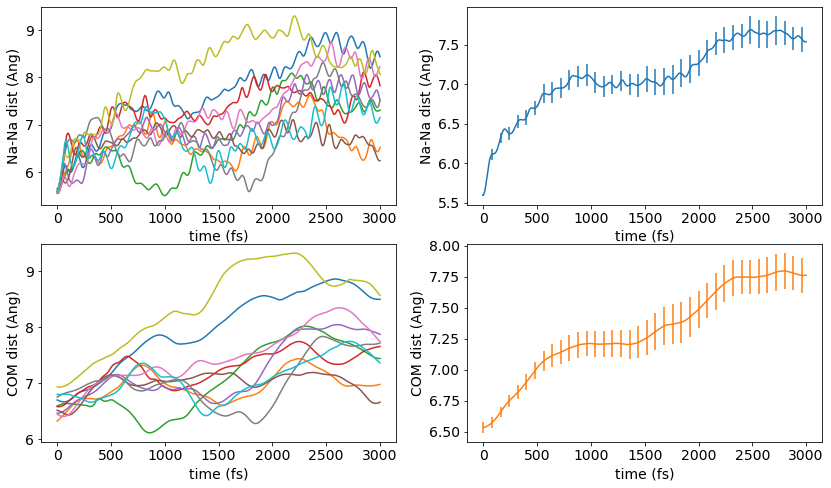

In [18]:
%matplotlib inline
plt.rcParams.update({'font.size': 14})
dirs = np.arange(11,21)

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
for i in range(len(dirs)):
    plt.plot(t_frames, bond_dist[i])
plt.xlabel('time (fs)')
plt.ylabel('Na-Na dist (Ang)')

plt.subplot(2,2,2)
plt.plot(t_frames, avg_bond_dist, 'C0')
plt.errorbar(t_frames[::20], avg_bond_dist[::20], yerr=sem_bond_dist[::20], color='C0', linestyle='none')
plt.xlabel('time (fs)')
plt.ylabel('Na-Na dist (Ang)')

plt.subplot(2,2,3)
for i in range(len(dirs)):
    plt.plot(t_frames, com_dist[i])
plt.xlabel('time (fs)')
plt.ylabel('COM dist (Ang)')

plt.subplot(2,2,4)
plt.plot(t_frames, avg_com_dist, 'C1')
plt.errorbar(t_frames[::20], avg_com_dist[::20], yerr=sem_com_dist[::20], color='C1', linestyle='none')
plt.xlabel('time (fs)')
plt.ylabel('COM dist (Ang)')

In [28]:
root = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/55init/'
dirs = np.arange(2,21)

bond_dist = np.array([np.loadtxt(root+str(i)+'/bondumb2.out')[int(t0/4):int(t/4+1):int(dt/4),1] for i in dirs])

Text(0.5, 0, 'time (fs)')

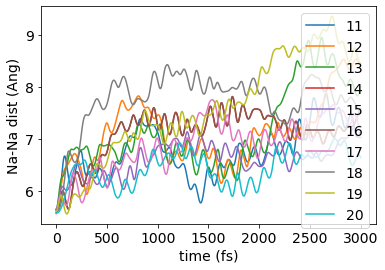

In [19]:
dirs = np.arange(11,21)
for i in range(len(dirs)):
    plt.plot(t_frames, bond_dist[dirs[i]-2], label=dirs[i])
plt.legend(loc=1)
plt.ylabel('Na-Na dist (Ang)')
plt.xlabel('time (fs)')

Text(0.5, 0, 'time (fs)')

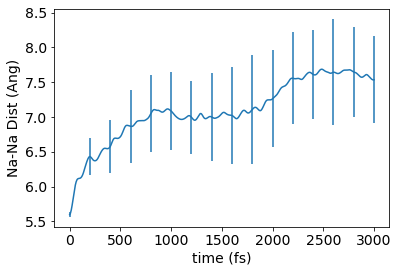

In [20]:
plt.plot(t_frames, np.average(bond_dist, axis=0))
plt.errorbar(t_frames[::50], np.average(bond_dist, axis=0)[::50], yerr=np.std(bond_dist, axis=0)[::50], color='C0', linestyle='None')
plt.ylabel('Na-Na Dist (Ang)')
plt.xlabel('time (fs)')

In [9]:
root = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/55init/'
dirs = np.arange(2,21)

(t0, t, dt) = (0,5000,4)
t_frames = np.arange(t0, t+dt, dt)
(r0, r, dr) = (5, 10, 0.1)
r_max = np.arange(r0, r+dr, dr)

bond_dist = np.array([np.loadtxt(root+str(i)+'/bondumb2.out')[int(t0/4):int(t/4+1):int(dt/4),1] for i in dirs])
avg_bond_dist = np.average(bond_dist, axis=0)
sem_bond_dist = stats.sem(bond_dist, axis=0)
std_bond_dist = np.std(bond_dist, axis=0)

prob_r_max = np.zeros([len(t_frames), len(r_max)])
for i in range(1,len(t_frames)):
    for j in range(len(dirs)):
        if np.max(bond_dist[j,:i]) < r and np.max(bond_dist[j,:i]) > r0:
            my_ind = int((np.max(bond_dist[j,:i])-r0)/dr)
            prob_r_max[i,:my_ind] += 1
        elif np.max(bond_dist[j,:i]) > r:
            prob_r_max[i] += 1
prob_r_max /= len(dirs)

Text(0.5, 0, 'r (Ang)')

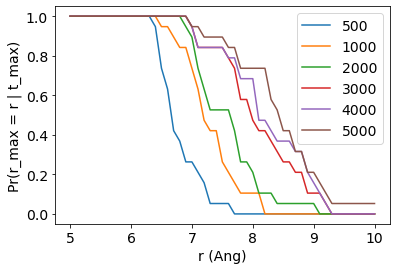

In [64]:
plt.plot(r_max, prob_r_max[int(500/dt)], label=str(t_frames[int(500/dt)]))
plt.plot(r_max, prob_r_max[int(1000/dt)], label=str(t_frames[int(1000/dt)]))
plt.plot(r_max, prob_r_max[int(2000/dt)], label=str(t_frames[int(2000/dt)]))
plt.plot(r_max, prob_r_max[int(3000/dt)], label=str(t_frames[int(3000/dt)]))
plt.plot(r_max, prob_r_max[int(4000/dt)], label=str(t_frames[int(4000/dt)]))
plt.plot(r_max, prob_r_max[-1], label=str(t_frames[-1]))
plt.legend(loc=1)
plt.ylabel('Pr(r_max = r | t_max)')
plt.xlabel('r (Ang)')

In [3]:
root = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/55init/'
dirs = np.arange(2,21)

(t0, t, dt) = (0, 5000, 4)
t_frames = np.arange(t0, t+dt, dt)

com_dist = np.zeros([len(dirs), len(t_frames)])
coord_num = np.zeros([len(dirs), len(t_frames), 2])
node_angle = np.zeros([len(dirs), len(t_frames)])
mol_geo = np.zeros([len(dirs), len(t_frames), 2])
for i in range(len(dirs)):
    my_dir = root+str(dirs[i])
    dipole = np.loadtxt(my_dir+'/out.dip')[int(t0/4):int(t/4+1):int(dt/4),3:6]
    com = thf_lib.calcCOMPosConf(my_dir, t0, t, dt)
    com_dist[i] = np.array([thf_lib.dist(com[j,0,:], com[j,1,:]) for j in range(len(t_frames))])
    for j in range(len(t_frames)):
        r_Na, r_THF = thf_lib.readPos(my_dir+'/out.conf', t_frames[j])
        coord_num[i,j] = thf_lib.calcCoordNum(r_Na, r_THF)
        node_angle[i,j] = thf_lib.calcNodeAngle(r_Na, dipole[j])
        # calculating molecular geometry
        coord_indices = thf_lib.findCoordIndex(r_Na, r_THF)[0]
        na1_indices = 5*np.array([n for n in coord_indices[0] if n >= 0])
        na2_indices = 5*np.array([n for n in coord_indices[1] if n >= 0])
        mol_geo[i,j,0] = thf_lib.calcMolGeo(r_Na[0], r_THF[na1_indices])
        mol_geo[i,j,1] = thf_lib.calcMolGeo(r_Na[1], r_THF[na2_indices])
avg_com_dist = np.average(com_dist, axis=0)
sem_com_dist = stats.sem(com_dist, axis=0)
std_com_dist = np.std(com_dist, axis=0)
avg_coord_num = np.average(coord_num, axis=0) 
sem_coord_num = stats.sem(coord_num, axis=0)
std_coord_num = np.std(coord_num, axis=0)
avg_node_angle = np.average(node_angle, axis=0)
sem_node_angle = stats.sem(node_angle, axis=0)
std_node_angle = np.std(node_angle, axis=0)
avg_mol_geo = np.average(mol_geo, axis=0)
sem_mol_geo = stats.sem(mol_geo, axis=0)
std_mol_geo = np.std(mol_geo, axis=0)

In [ ]:
root = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/55init/'
dirs = np.arange(2,21)

(t0, t, dt) = (0, 5000, 4)
t_frames = np.arange(t0, t+dt, dt)

bond_dist = np.zeros([len(dirs), len(t_frames)])
U_nana = np.zeros([len(dirs), len(t_frames)])
U_nathf = np.zeros([len(dirs), len(t_frames)])
U_thfthf = np.zeros([len(dirs), len(t_frames)])
U_quant = np.zeros([len(dirs), len(t_frames)])
for d in range(len(dirs)):
    my_dir = root+str(dirs[d])
    U_quant[d] = np.loadtxt(my_dir+'/out.quante2')[int(t0/4):int(t/4+1):int(dt/4),1]
    bond_dist[d] = np.loadtxt(my_dir+'/bondumb2.out')[int(t0/4):int(t/4+1):int(dt/4),1]
    for i in range(len(t_frames)):
        r_Na, r_THF = thf_lib.readPos(my_dir+'/out.conf', t_frames[i])
        
        U_nana[d,i] = thf_lib.calcUNaNa(r_Na[0], r_Na[1])
        for j in range(int(len(r_THF)/5)):
            U_nathf[d,i] += thf_lib.calcUNaTHF(r_Na[0], r_THF[5*j:5*(j+1)])
            U_nathf[d,i] += thf_lib.calcUNaTHF(r_Na[1], r_THF[5*j:5*(j+1)])
        for j in range(int(len(r_THF)/5-1)):
            for k in range(j+1,int(len(r_THF)/5)):
                U_thfthf[d,i] += thf_lib.calcUTHFTHF(r_THF[5*j:5*(j+1)], r_THF[5*k:5*(k+1)])
avg_U_nana = np.average(U_nana, axis=0)
sem_U_nana = stats.sem(U_nana, axis=0)
avg_U_nathf = np.average(U_nathf, axis=0)
sem_U_nathf = stats.sem(U_nathf, axis=0)
avg_U_thfthf = np.average(U_thfthf, axis=0)
sem_U_thfthf = stats.sem(U_thfthf, axis=0)
avg_U_quant = np.average(U_quant, axis=0)
sem_U_quant = stats.sem(U_quant, axis=0)
avg_bond_dist = np.average(bond_dist, axis=0)
sem_bond_dist = stats.sem(bond_dist, axis=0)

In [ ]:
np.save('Na2+_THF_liq/55init/bond_dist.npy', bond_dist)
np.save('Na2+_THF_liq/55init/com_dist.npy', com_dist)
np.save('Na2+_THF_liq/55init/coord_num.npy', coord_num)
np.save('Na2+_THF_liq/55init/node_angle.npy', node_angle)
np.save('Na2+_THF_liq/55init/mol_geo.npy', mol_geo)
np.save('Na2+_THF_liq/55init/U_nana.npy', U_nana)
np.save('Na2+_THF_liq/55init/U_nathf.npy', U_nathf)
np.save('Na2+_THF_liq/55init/U_thfthf.npy', U_thfthf)
np.save('Na2+_THF_liq/55init/U_quant.npy', U_quant)

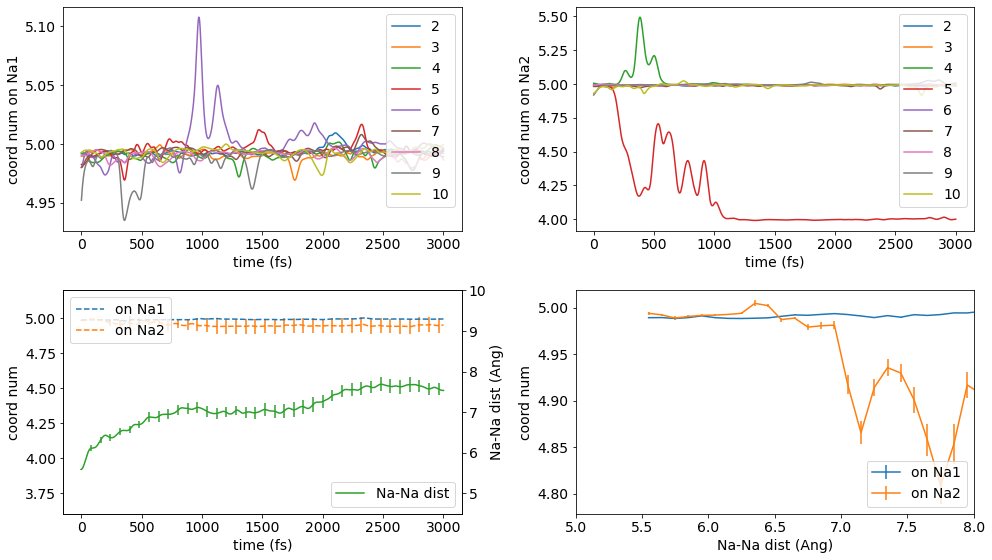

In [21]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
dirs = np.arange(2,11)
for i in range(len(dirs)):
    plt.plot(t_frames, coord_num[dirs[i]-2,:,0], label=str(dirs[i]))
plt.legend(loc=1)
plt.ylabel('coord num on Na1')
plt.xlabel('time (fs)')

plt.subplot(2,2,2)
for i in range(len(dirs)):
    plt.plot(t_frames, coord_num[dirs[i]-2,:,1], label=str(dirs[i]))
plt.legend(loc=1)
plt.ylabel('coord num on Na2')
plt.xlabel('time (fs)')

plt.subplot(2,2,3)
plt.plot(t_frames, avg_coord_num[:,0], 'C0--', label='on Na1')
plt.errorbar(t_frames[::20], avg_coord_num[::20,0], yerr=sem_coord_num[::20,0], color='C0', linestyle='none')
plt.plot(t_frames, avg_coord_num[:,1], 'C1--', label='on Na2')
plt.errorbar(t_frames[::20], avg_coord_num[::20,1], yerr=sem_coord_num[::20,1], color='C1', linestyle='none')
plt.ylim([3.6,5.2])
plt.legend(loc=2)
plt.ylabel('coord num')
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(t_frames, avg_bond_dist, color='C2', label='Na-Na dist')
plt.errorbar(t_frames[::20], avg_bond_dist[::20], yerr=sem_bond_dist[::20], color='C2', linestyle='none')
plt.ylim([4.5,10])
plt.legend(loc=4)
plt.ylabel('Na-Na dist (Ang)')

plt.subplot(2,2,4)
# plt.plot(avg_bond_dist, avg_coord_num[:,0], 'C0', label='on Na1')
# plt.errorbar(avg_bond_dist[::20], avg_coord_num[::20,0], yerr=sem_coord_num[::20,0], color='C0', linestyle='none')
# plt.plot(avg_bond_dist, avg_coord_num[:,1], 'C1', label='on Na2')
# plt.errorbar(avg_bond_dist[::20], avg_coord_num[::20,1], yerr=sem_coord_num[::20,1], color='C1', linestyle='none')
plt.errorbar(binned_coord_num1[:,0], binned_coord_num1[:,1], yerr=binned_coord_num1[:,2], color='C0', label='on Na1')
plt.errorbar(binned_coord_num2[:,0], binned_coord_num2[:,1], yerr=binned_coord_num2[:,2], color='C1', label='on Na2')
plt.xlim([5,8])
plt.legend(loc=4)
plt.ylabel('coord num')
plt.xlabel('Na-Na dist (Ang)')

plt.tight_layout()

<IPython.core.display.Javascript object>


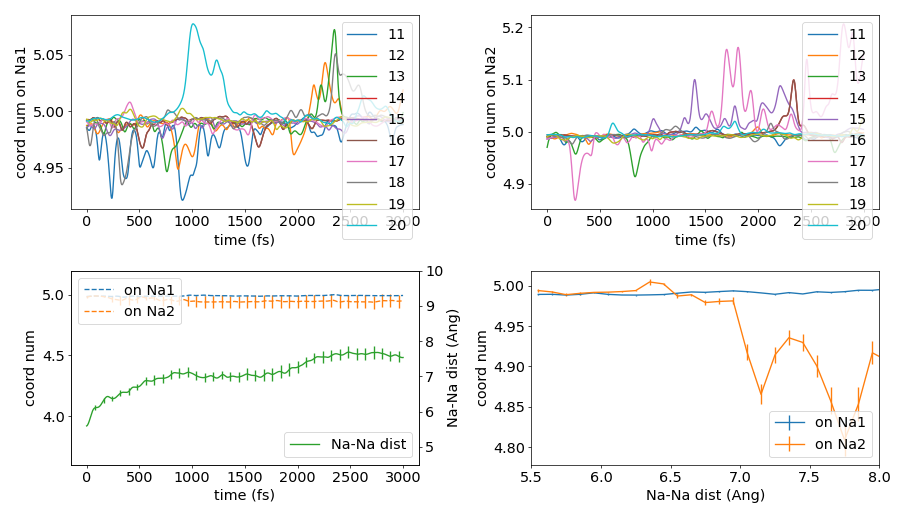

In [61]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
dirs = np.arange(11,21)
for i in range(len(dirs)):
    plt.plot(t_frames, coord_num[dirs[i]-2,:,0], label=str(dirs[i]))
plt.legend(loc=1)
plt.ylabel('coord num on Na1')
plt.xlabel('time (fs)')

plt.subplot(2,2,2)
for i in range(len(dirs)):
    plt.plot(t_frames, coord_num[dirs[i]-2,:,1], label=str(dirs[i]))
plt.legend(loc=1)
plt.ylabel('coord num on Na2')
plt.xlabel('time (fs)')

plt.subplot(2,2,3)
plt.plot(t_frames, avg_coord_num[:,0], 'C0--', label='on Na1')
plt.errorbar(t_frames[::20], avg_coord_num[::20,0], yerr=sem_coord_num[::20,0], color='C0', linestyle='none')
plt.plot(t_frames, avg_coord_num[:,1], 'C1--', label='on Na2')
plt.errorbar(t_frames[::20], avg_coord_num[::20,1], yerr=sem_coord_num[::20,1], color='C1', linestyle='none')
plt.ylim([3.6,5.2])
plt.legend(loc=2)
plt.ylabel('coord num')
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(t_frames, avg_bond_dist, color='C2', label='Na-Na dist')
plt.errorbar(t_frames[::20], avg_bond_dist[::20], yerr=sem_bond_dist[::20], color='C2', linestyle='none')
plt.ylim([4.5,10])
plt.legend(loc=4)
plt.ylabel('Na-Na dist (Ang)')

plt.subplot(2,2,4)
# plt.plot(avg_bond_dist, avg_coord_num[:,0], 'C0', label='on Na1')
# plt.errorbar(avg_bond_dist[::20], avg_coord_num[::20,0], yerr=sem_coord_num[::20,0], color='C0', linestyle='none')
# plt.plot(avg_bond_dist, avg_coord_num[:,1], 'C1', label='on Na2')
# plt.errorbar(avg_bond_dist[::20], avg_coord_num[::20,1], yerr=sem_coord_num[::20,1], color='C1', linestyle='none')
plt.errorbar(binned_coord_num1[:,0], binned_coord_num1[:,1], yerr=binned_coord_num1[:,2], color='C0', label='on Na1')
plt.errorbar(binned_coord_num2[:,0], binned_coord_num2[:,1], yerr=binned_coord_num2[:,2], color='C1', label='on Na2')
plt.xlim([5.5,8])
plt.legend(loc=4)
plt.ylabel('coord num')
plt.xlabel('Na-Na dist (Ang)')

plt.tight_layout()

<IPython.core.display.Javascript object>


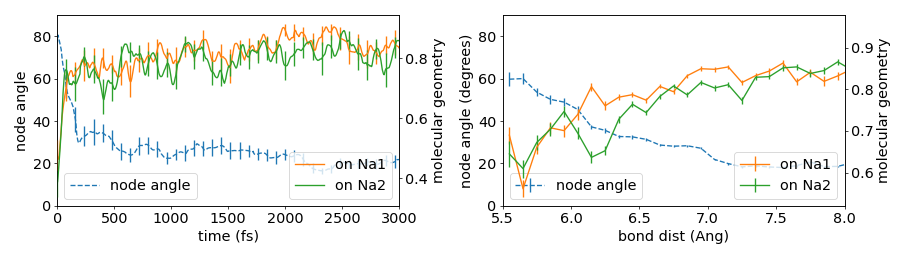

In [54]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(t_frames, avg_node_angle, 'C0--', label='node angle')
plt.errorbar(t_frames[::20], avg_node_angle[::20], yerr=sem_node_angle[::20], color='C0', linestyle='none')
plt.ylim([0,90])
plt.xlim([0,3000])
plt.legend(loc=3)
plt.ylabel('node angle')
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(t_frames, avg_mol_geo[:,0], color='C1', label='on Na1')
plt.errorbar(t_frames[::20], avg_mol_geo[::20,0], color='C1', yerr=sem_mol_geo[::20,0], linestyle='none')
plt.plot(t_frames, avg_mol_geo[:,1], color='C2', label='on Na2')
plt.errorbar(t_frames[::20], avg_mol_geo[::20,1], color='C2', yerr=sem_mol_geo[::20,1], linestyle='none')
#plt.ylim([0.5,1])
plt.ylabel('molecular geometry')
plt.legend(loc=4)

plt.subplot(1,2,2)
plt.errorbar(binned_angles[:,0], binned_angles[:,1], yerr=binned_angles[:,2], color='C0', linestyle='--', label='node angle')
plt.ylim([0,90])
plt.xlim([4.8, 10.2])
plt.ylabel('node angle (degrees)')
plt.xlabel('bond dist (Ang)')
plt.legend(loc=3)
plt.twinx()

plt.errorbar(binned_geo1[:,0], binned_geo1[:,1], yerr=binned_geo1[:,2], color='C1', label='on Na1')
plt.errorbar(binned_geo2[:,0], binned_geo2[:,1], yerr=binned_geo2[:,2], color='C2', label='on Na2')
#plt.ylim([0.5,1])
plt.xlim([5.5,8])
plt.ylabel('molecular geometry')
plt.legend(loc=4)

plt.tight_layout()

In [19]:
root = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/55init/'
dirs = np.arange(2,21)

(t0, t, dt) = (0, 5000, 4)
t_frames = np.arange(t0, t+dt, dt)

U_nana = np.zeros([len(dirs), len(t_frames)])
U_nathf = np.zeros([len(dirs), len(t_frames)])
U_thfthf = np.zeros([len(dirs), len(t_frames)])
U_quant = np.zeros([len(dirs), len(t_frames)])
for d in range(len(dirs)):
    my_dir = root+str(dirs[d])
    U_quant[d] = np.loadtxt(my_dir+'/out.quante2')[int(t0/4):int(t/4+1):int(dt/4),1]
    for i in range(len(t_frames)):
        r_Na, r_THF = thf_lib.readPos(my_dir+'/out.conf', t_frames[i])
        
        U_nana[d,i] = thf_lib.calcUNaNa(r_Na[0], r_Na[1])
        
        coord_indices = thf_lib.findCoordIndex(r_Na, r_THF)[0]
        coord_indices = 5*np.array([n for n in coord_indices.flatten() if n >= 0])
        coord_indices = np.array(list(set(coord_indices)))
        for j in range(len(coord_indices)):
            U_nathf[d,i] += thf_lib.calcUNaTHF(r_Na[0], r_THF[coord_indices[j]:coord_indices[j]+5])
            U_nathf[d,i] += thf_lib.calcUNaTHF(r_Na[1], r_THF[coord_indices[j]:coord_indices[j]+5])
        for j in range(len(coord_indices)-1):
            for k in range(j+1,len(coord_indices)):
                U_thfthf[d,i] += thf_lib.calcUTHFTHF(r_THF[coord_indices[j]:coord_indices[j]+5],
                                                    r_THF[coord_indices[k]:coord_indices[k]+5])
avg_U_nana = np.average(U_nana, axis=0)
sem_U_nana = stats.sem(U_nana, axis=0)
avg_U_nathf = np.average(U_nathf, axis=0)
sem_U_nathf = stats.sem(U_nathf, axis=0)
avg_U_thfthf = np.average(U_thfthf, axis=0)
sem_U_thfthf = stats.sem(U_thfthf, axis=0)
avg_U_quant = np.average(U_quant, axis=0)
sem_U_quant = stats.sem(U_quant, axis=0)
avg_bond_dist = np.average(bond_dist, axis=0)
sem_bond_dist = stats.sem(bond_dist, axis=0)

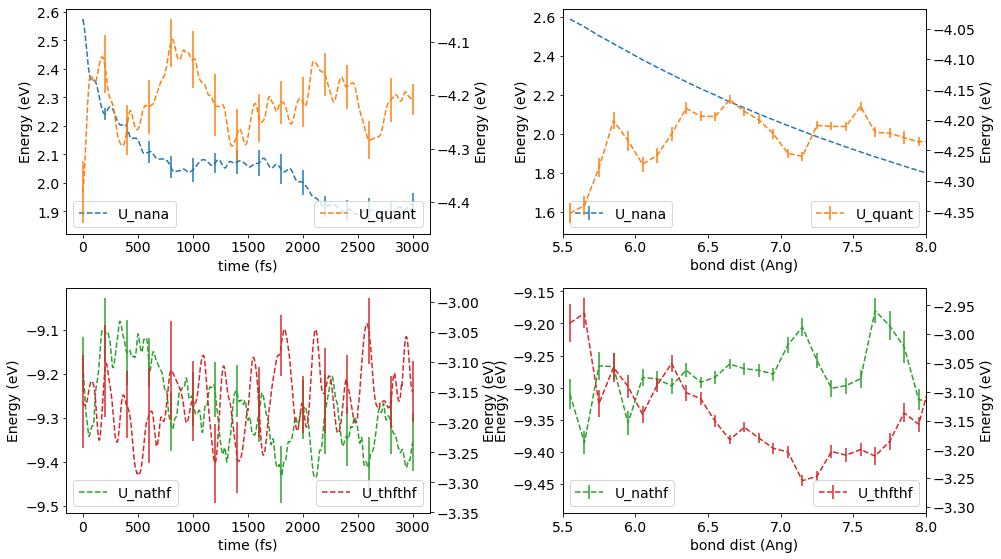

In [25]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(t_frames, avg_U_nana, 'C0--', label='U_nana')
plt.errorbar(t_frames[::50], avg_U_nana[::50], yerr=sem_U_nana[::50], color='C0', linestyle='none')
plt.legend(loc=3)
plt.ylabel('Energy (eV)')
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(t_frames, avg_U_quant, 'C1--', label='U_quant')
plt.errorbar(t_frames[::50], avg_U_quant[::50], yerr=sem_U_quant[::50], color='C1', linestyle='none')
plt.legend(loc=4)
plt.ylabel('Energy (eV)')

plt.subplot(2,2,2)
plt.errorbar(binned_U_nana[:,0], binned_U_nana[:,1], yerr=binned_U_nana[:,2], color='C0', linestyle='--', label='U_nana')
plt.xlim([5.5,8])
plt.ylabel('Energy (eV)')
plt.xlabel('bond dist (Ang)')
plt.legend(loc=3)

plt.twinx()
plt.errorbar(binned_U_quant[:,0], binned_U_quant[:,1], yerr=binned_U_quant[:,2], color='C1', linestyle='--', label='U_quant')
plt.ylabel('Energy (eV)')
plt.legend(loc=4)

plt.subplot(2,2,3)
plt.plot(t_frames, avg_U_nathf, 'C2--', label='U_nathf')
plt.errorbar(t_frames[::50], avg_U_nathf[::50], yerr=sem_U_nathf[::50], color='C2', linestyle='none')
plt.legend(loc=3)
plt.ylabel('Energy (eV)')
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(t_frames, avg_U_thfthf, 'C3--', label='U_thfthf')
plt.errorbar(t_frames[::50], avg_U_thfthf[::50], yerr=sem_U_thfthf[::50], color='C3', linestyle='none')
plt.legend(loc=4)
plt.ylabel('Energy (eV)')

plt.subplot(2,2,4)
plt.errorbar(binned_U_nathf[:,0], binned_U_nathf[:,1], yerr=binned_U_nathf[:,2], color='C2', linestyle='--', label='U_nathf')
plt.xlim([5.5,8])
plt.ylabel('Energy (eV)')
plt.xlabel('bond dist (Ang)')
plt.legend(loc=3)

plt.twinx()
plt.errorbar(binned_U_thfthf[:,0], binned_U_thfthf[:,1], yerr=binned_U_thfthf[:,2], color='C3', linestyle='--', label='U_thfthf')
plt.ylabel('Energy (eV)')
plt.legend(loc=4)

plt.tight_layout()

In [8]:
plt.rcParams.update({'font.size': 16})

In [ ]:
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['top'].set_color('k')
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['bottom'].set_color('k')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['left'].set_color('k')
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['right'].set_color('k')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


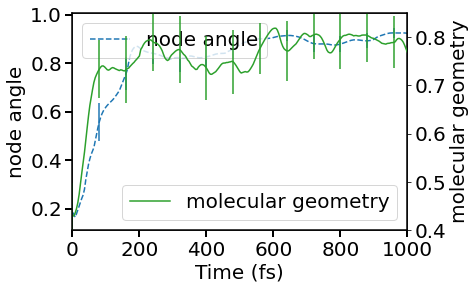

In [23]:
fig, axs = plt.subplots(figsize=(6,4))
axs.plot(t_frames, np.cos(avg_node_angle/180*np.pi), 'C0--', label='node angle')
axs.errorbar(t_frames[::20], np.cos(avg_node_angle[::20]/180*np.pi), yerr=np.sin(avg_node_angle[::20]/180*np.pi)*sem_node_angle[::20]/180*np.pi, color='C0', linestyle='none')
#axs.set_ylim([0,1])
axs.set_xlim([0,1000])
axs.legend(loc=2)
axs.set_ylabel('node angle')
axs.set_xlabel('Time (fs)')

ax2 = axs.twinx()
ax2.plot(t_frames, (avg_mol_geo[:,1]+avg_mol_geo[:,0])/2, color='C2', label='molecular geometry')
ax2.errorbar(t_frames[::20], (avg_mol_geo[::20,1]+avg_mol_geo[::20,0])/2, color='C2', yerr=np.sqrt(sem_mol_geo[::20,1]**2+sem_mol_geo[::20,0]**2), linestyle='none')
ax2.set_ylim([0.4,0.85])
ax2.set_ylabel('molecular geometry')
ax2.legend(loc=4)

axs.spines['top'].set_linewidth(1.5)
axs.spines['top'].set_color('k')
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_linewidth(1.5)
axs.spines['left'].set_color('k')
axs.spines['right'].set_linewidth(1.5)
axs.spines['right'].set_color('k')
axs.tick_params(which='major', length=7, width=2)

plt.savefig('Na2+_THF_liq/55init/figs/node_angle_mol_geo.eps', format='eps')

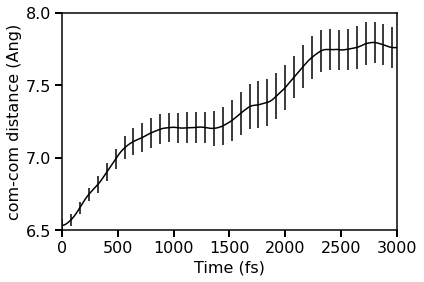

In [11]:
fig, axs = plt.subplots(figsize=(6,4))
axs.plot(t_frames, avg_com_dist, 'k')
axs.errorbar(t_frames[::20], avg_com_dist[::20], yerr=sem_com_dist[::20], color='k', linestyle='none')
axs.set_ylim([6.5,8])
axs.set_yticks(np.arange(6.5,8.5,0.5))
axs.set_xlim([0,3000])
axs.set_ylabel('com-com distance (Ang)')
axs.set_xlabel('Time (fs)')

axs.spines['top'].set_linewidth(1.5)
axs.spines['top'].set_color('k')
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_linewidth(1.5)
axs.spines['left'].set_color('k')
axs.spines['right'].set_linewidth(1.5)
axs.spines['right'].set_color('k')
axs.tick_params(which='major', length=7, width=2)
# axs.tick_params(axis='x', labelsize=14)
# axs.tick_params(axis='y', labelsize=14)

plt.savefig('Na2+_THF_liq/55init/figs/com_dist_time.eps', format='eps')

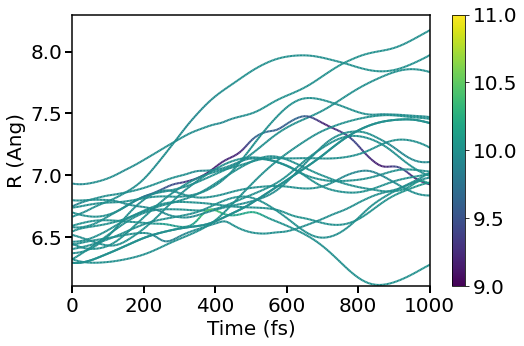

In [7]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

# fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig, axs = plt.subplots(figsize=(8,5))

dirs = np.arange(2,21)

x = t_frames
for i in range(len(dirs)):
    y = com_dist[i]
    dydx = coord_num[i,:,0] + coord_num[i,:,1]
    
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    norm = plt.Normalize(9, 11)
    lc = LineCollection(segments, cmap='viridis', norm=norm)
    # Set the values used for colormapping
    lc.set_array(dydx)
    lc.set_linewidth(2)
    line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min(), x.max())
axs.set_ylim(6.1, 8.3)
axs.set_xlim([0,1000])
axs.set_xlabel('Time (fs)')
axs.set_ylabel('R (Ang)')

axs.spines['top'].set_linewidth(1.5)
axs.spines['top'].set_color('k')
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_linewidth(1.5)
axs.spines['left'].set_color('k')
axs.spines['right'].set_linewidth(1.5)
axs.spines['right'].set_color('k')
axs.tick_params(which='major', length=7, width=2)
# axs.tick_params(axis='x', labelsize=14)
# axs.tick_params(axis='y', labelsize=14)
plt.savefig('Na2+_THF_liq/55init/figs/com_dist_time_swarm.eps', format='eps')
plt.show()

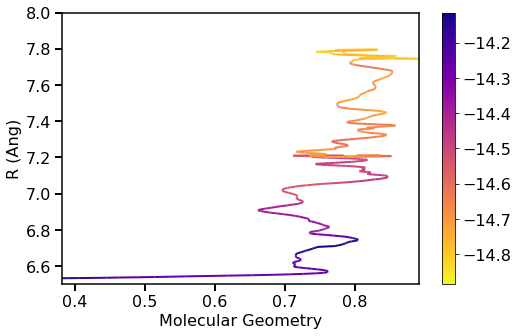

In [17]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

# fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig, axs = plt.subplots(figsize=(8,5))

x = avg_mol_geo[:,1]
y = avg_com_dist
dydx = avg_U_nathf+avg_U_thfthf+avg_U_quant+avg_U_nana

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='plasma_r', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min(), x.max())
axs.set_ylim(6.5, 8)
axs.set_xlabel('Molecular Geometry')
axs.set_ylabel('R (Ang)')

axs.spines['top'].set_linewidth(1.5)
axs.spines['top'].set_color('k')
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_linewidth(1.5)
axs.spines['left'].set_color('k')
axs.spines['right'].set_linewidth(1.5)
axs.spines['right'].set_color('k')
axs.tick_params(which='major', length=7, width=2)
# axs.tick_params(axis='x', labelsize=14)
# axs.tick_params(axis='y', labelsize=14)
plt.savefig('Na2+_THF_liq/55init/figs/energy_2D.eps', format='eps')
plt.show()

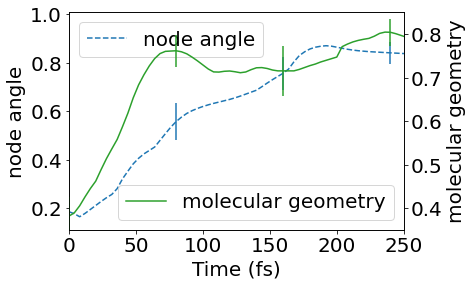

In [33]:
fig, axs = plt.subplots(figsize=(6,4))
axs.plot(t_frames, np.cos(avg_node_angle/180*np.pi), 'C0--', label='node angle')
axs.errorbar(t_frames[::20], np.cos(avg_node_angle[::20]/180*np.pi), yerr=np.sin(avg_node_angle[::20]/180*np.pi)*sem_node_angle[::20]/180*np.pi, color='C0', linestyle='none')
#axs.set_ylim([0,1])
axs.set_xlim([0,250])
axs.legend(loc=2)
axs.set_ylabel('node angle')
axs.set_xlabel('Time (fs)')

ax2 = axs.twinx()
ax2.plot(t_frames, avg_mol_geo[:,1], color='C2', label='molecular geometry')
ax2.errorbar(t_frames[::20], avg_mol_geo[::20,1], color='C2', yerr=sem_mol_geo[::20,1], linestyle='none')
ax2.set_ylim([0.35,0.85])
ax2.set_ylabel('molecular geometry')
ax2.legend(loc=4)

In [42]:
plt.rcParams.update({'font.size': 16})

(0.0, 500.0)

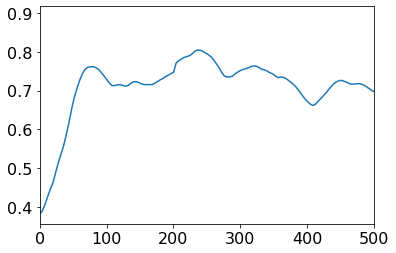

In [43]:
plt.plot(t_frames,avg_mol_geo[:,1])
plt.xlim([0,500])

In [88]:
np.argwhere(avg_mol_geo[:,1] == np.max(avg_mol_geo[:25,1]))

array([[20]])

In [35]:
avg_U_total = avg_U_nana+avg_U_nathf+avg_U_thfthf+avg_U_quant

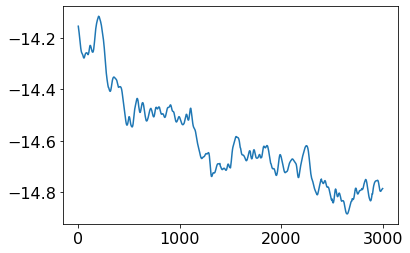

In [44]:
plt.plot(t_frames, avg_U_total)

In [99]:
np.average(avg_U_total[625:751]) - avg_U_total[20]

-0.5521480926175002

In [39]:
avg_bond_dist[750]

7.535651976414691

In [98]:
print(np.average(avg_U_nana[625:751]) - avg_U_nana[20])
print(np.average(avg_U_nathf[625:751]) - avg_U_nathf[20])
print(np.average(avg_U_thfthf[625:751]) - avg_U_thfthf[20])
print(np.average(avg_U_quant[625:751]) - avg_U_quant[20])

-0.4574426216406129
-0.028817465619868088
0.004897120373974495
-0.07078512573099438


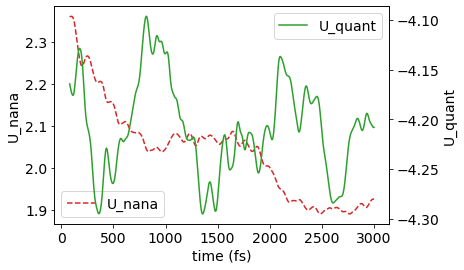

In [96]:
plt.plot(t_frames[20:751], avg_U_nana[20:751], 'C3--', label='U_nana')
plt.ylabel('U_nana')
plt.xlabel('time (fs)')
plt.legend(loc=3)
plt.twinx()
plt.plot(t_frames[20:751], avg_U_quant[20:751],'C2', label='U_quant')
plt.ylabel('U_quant')
plt.legend(loc=1)

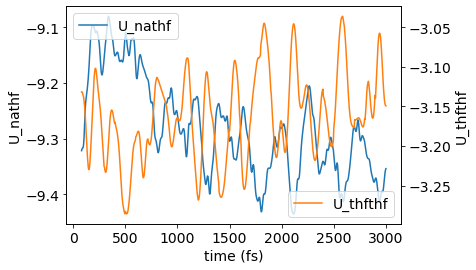

In [97]:
plt.plot(t_frames[20:751], avg_U_nathf[20:751], label='U_nathf')
plt.ylabel('U_nathf')
plt.xlabel('time (fs)')
plt.legend(loc=2)
plt.twinx()
plt.plot(t_frames[20:751], avg_U_thfthf[20:751],'C1', label='U_thfthf')
plt.ylabel('U_thfthf')
plt.legend(loc=4)

In [18]:
binned2d_U_nana = thf_lib.binScalars2D(U_nana.flatten(), com_dist.flatten(), mol_geo[:,:,1].flatten(), 6.25, 8, 0.25, 0.35, 0.95, 0.05)
binned2d_U_nathf = thf_lib.binScalars2D(U_nathf.flatten(), com_dist.flatten(), mol_geo[:,:,1].flatten(), 6.25, 8, 0.25, 0.35, 0.95, 0.05)
binned2d_U_thfthf = thf_lib.binScalars2D(U_thfthf.flatten(), com_dist.flatten(), mol_geo[:,:,1].flatten(), 6.25, 8, 0.25, 0.35, 0.95, 0.05)
binned2d_U_quant = thf_lib.binScalars2D(U_quant.flatten(), com_dist.flatten(), mol_geo[:,:,1].flatten(), 6.25, 8, 0.25, 0.35, 0.95, 0.05)

<IPython.core.display.Javascript object>


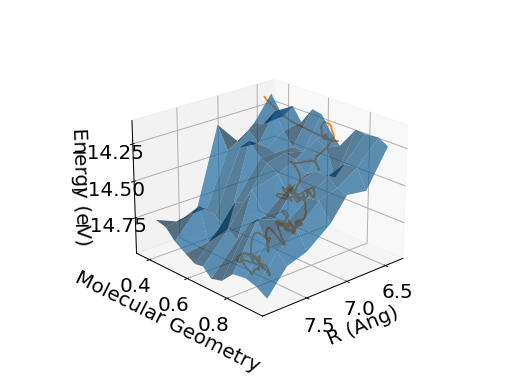

Text(0.5, 0, 'Energy (eV)')

In [19]:
%matplotlib notebook
plt.rcParams.update({'font.size': 16})
ax = plt.axes(projection='3d')
# ax.plot3D(bond_dist[15,:500], (mol_geo[15,:500,1]+mol_geo[15,:500,0])/2, U_nathf[15,:500]+U_thfthf[15,:500]+
#           U_nana[15,:500]+U_quant[15,:500], 'C0')
# for i in np.arange(0,3):
#     ax.plot3D(com_dist[i,:], mol_geo[i,:,1], U_nathf[i,:]+U_thfthf[i,:]+U_nana[i,:], 'C'+str(i))
# ax.plot3D(avg_com_dist, avg_mol_geo[:,1], avg_U_nathf+avg_U_thfthf+avg_U_nana, 'gray')
#ax.plot3D(avg_bond_dist, avg_mol_geo[:,0], avg_U_nathf+avg_U_thfthf+avg_U_nana, 'C0')
ax.plot3D(avg_com_dist, avg_mol_geo[:,1], avg_U_nathf+avg_U_thfthf+avg_U_quant+avg_U_nana, 'C1')
ax.plot_surface(binned2d_U_nathf[:,:,0], binned2d_U_nathf[:,:,1], binned2d_U_nathf[:,:,2]+
                  binned2d_U_thfthf[:,:,2]+binned2d_U_nana[:,:,2]+binned2d_U_quant[:,:,2], rstride=1, cstride=1, alpha=0.7)
#ax.plot_wireframe(binned2d_U_nana[:,:,0], binned2d_U_nana[:,:,1], binned2d_U_quant[:,:,2], color='gray')
ax.set_xlabel('R (Ang)')
ax.set_ylabel('Molecular Geometry')
ax.set_zlabel('Energy (eV)')

In [ ]:
plt.savefig('Na2+_THF_liq/55init/figs/energy_surf.eps', format='eps')

In [ ]:
def derivU2D(U):
    (a,b) = np.shape(U)[:2]
    dU = np.zeros([a,b,6])
    (dx, dy) = (np.round(U[1,0,0] - U[0,0,0],2), np.round(U[0,1,1] - U[0,0,1],2))

    for i in range(a-1):
        for j in range(b-1):
            dU[i,j,2] = (U[i+1,j,2] - U[i,j,2])/dx
            dU[i,j,3] = (U[i,j+1,2] - U[i,j,2])/dy

            dU[i,j,4] = np.sqrt((U[i+1,j,3]**2 + U[i,j,3]**2))/dx
            dU[i,j,5] = np.sqrt((U[i,j+1,3]**2 + U[i,j,3]**2))/dy

    dU[:,:,0] = U[:,:,0]
    dU[:,:,1] = U[:,:,1]
    return dU

In [ ]:
binned2d_U_nana = thf_lib.binScalars2D(U_nana.flatten(), bond_dist.flatten(), mol_geo[:,:,1].flatten(), 4.75, 8, 0.25, 0.4, 1, 0.05)
dU_nana_2D = derivU2D(binned2d_U_nana)

In [ ]:
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.plot_wireframe(dU_nana_2D[:,:,0], dU_nana_2D[:,:,1],dU_nana_2D[:,:,3])
#ax.plot_wireframe(binned2d_U_nana[:,:,0], binned2d_U_nana[:,:,1], binned2d_U_nana[:,:,2])